In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [26]:
academic_fields = [
    "Agricultural Sciences", "Biology & Biochemistry", "Chemistry", "Clinical Medicine", "Computer Science", "Economics & Business", "Engineering", "Environment Ecology", "Geosciences", "Immunology", "Materials Science", "Mathematics", "Microbiology", "Molecular Biology & Genetics", "Multidisciplinary", "Neuroscience & Behavior", "Pharmacology & Toxicology", "Physics", "Plant & Animal Science", "Psychiatry Psychology", "Social Sciences, General", "Space Science"
]
academic_fields_zh = [
    "农业科学", "生物学与生物化学", "化学", "临床医学", "计算机科学", "经济学与商学", "工程学", "环境科学与生态学", "地球科学", "免疫学", "材料科学", "数学", "微生物学", "分子生物学与遗传学", "交叉学科", "神经科学与行为学", "药理学与毒理学", "物理学", "植物学与动物科学", "精神病学与心理学", "社会科学（综合）", "空间科学"
]

# 一、 宏观定位与整体实力分析

## 1. 全学科排名

Web of Science Documents: 全球 361/9990，中国大陆 63/859
Cites: 全球 421/9990，中国大陆 57/859
Cites/Paper: 全球 6024/9990，中国大陆 173/859
Top Papers: 全球 358/9990，中国大陆 48/859


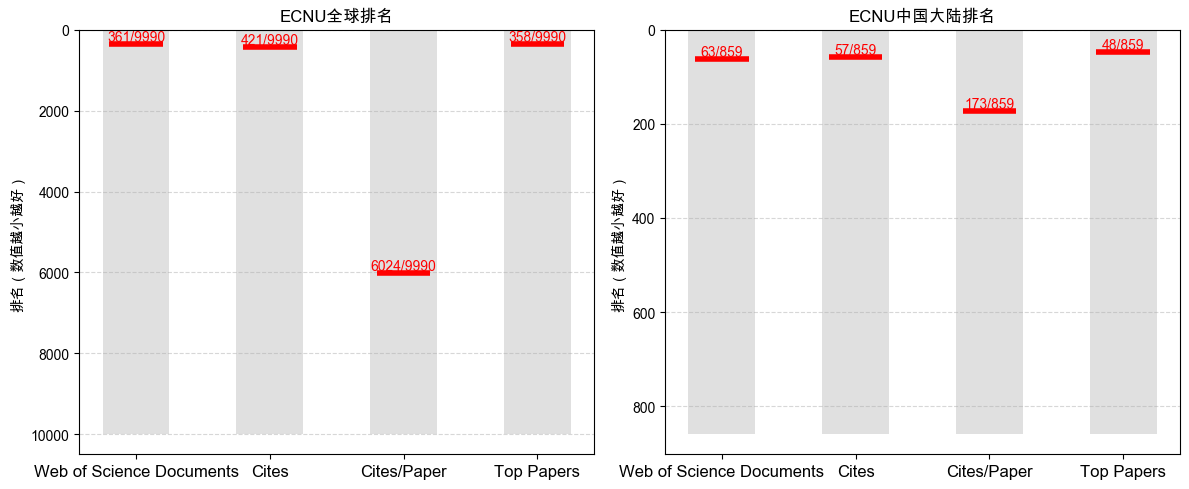

In [27]:
Institution_name = 'EAST CHINA NORMAL UNIVERSITY'
csv_path = 'csv/0-ALL.csv'

# 简化rank_columns，只保留列名字符串列表
rank_columns = ["Web of Science Documents", "Cites", "Cites/Paper", "Top Papers"]

df = pd.read_csv(csv_path, skiprows=1, encoding='latin1')
df_china = df[df['Countries/Regions'] == 'CHINA MAINLAND']

def get_rank(df, col, name):
    df_sorted = df.sort_values(by=col, ascending=False).reset_index(drop=True)
    row = df_sorted[df_sorted['Institutions'] == name]
    return (row.index[0] + 1) if not row.empty else None, len(df_sorted)

global_ranks, china_ranks, global_totals, china_totals, labels = [], [], [], [], []
for col in rank_columns:
    g_rank, g_total = get_rank(df, col, Institution_name)
    c_rank, c_total = get_rank(df_china, col, Institution_name)
    global_ranks.append(g_rank)
    china_ranks.append(c_rank)
    global_totals.append(g_total-1)
    china_totals.append(c_total)
    labels.append(col)
    print(f"{col}: 全球 {g_rank}/{g_total-1 if g_rank else '-'}，中国大陆 {c_rank}/{c_total if c_rank else '-'}")

x = range(len(rank_columns))
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, (ranks, totals, title, color) in enumerate([
    (global_ranks, global_totals, 'ECNU全球排名', 'skyblue'),
    (china_ranks, china_totals, 'ECNU中国大陆排名', 'orange')
]):
    for j, (rank, total) in enumerate(zip(ranks, totals)):
        # 绘制竖直进度条（背景为灰色，进度为浅色）
        ax[i].bar(j, total, color='#e0e0e0', width=0.5, zorder=1)
        # 绘制红色横杠表示ECNU排名
        if rank is not None:
            ax[i].hlines(rank, j-0.2, j+0.2, colors='red', linewidth=4, zorder=2)
            ax[i].text(j, rank, f"{rank}/{total}", ha='center', va='bottom', fontsize=10, color='red')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels, fontsize=12)
    ax[i].invert_yaxis()
    ax[i].set_ylim([max(totals)*1.05, 0])  # 让排名1在最上面
    ax[i].set_ylabel('排名（数值越小越好）')
    ax[i].set_title(title)
    ax[i].grid(axis='y', linestyle='--', alpha=0.5, zorder=0)

plt.tight_layout()
plt.show()

## 2. 学科排名

In [ ]:
all_files = [f for f in os.listdir("csv") if f.endswith('.csv') and not f.startswith('0-ALL')]
all_files.sort(key=lambda x: int(x.split('-')[0]))  # 按学科编号排序
# 文件名与学科名一一对应
if len(academic_fields) != len(all_files):
    academic_fields = [f.split('-', 1)[1].replace('.csv', '') for f in all_files]
    
results = []

# 依次处理每个学科文件，查找 ECNU 在该指标下的排名
for i, filename in enumerate(all_files):
    field_name = academic_fields[i] if i < len(academic_fields) else filename.split('-', 1)[1].replace('.csv', '')
    file_path = f"csv/{filename}"

    # 读取CSV文件
    df = pd.read_csv(file_path, skiprows=1, encoding='latin1')
    df_china = df[df['Countries/Regions'] == 'CHINA MAINLAND']
    
    # 存储该学科的结果
    field_result = {
        'field': field_name,
        'global_rank': {},
        'china_rank': {},
        'global_total': {},
        'china_total': {}
    }
    
    # 对每个指标计算排名
    for col in rank_columns:
        # 全球排名
        g_rank, g_total = get_rank(df, col, Institution_name)
        # 中国大陆排名
        c_rank, c_total = get_rank(df_china, col, Institution_name)
        
        field_result['global_rank'][col] = g_rank
        field_result['china_rank'][col] = c_rank
        field_result['global_total'][col] = g_total - 1 if g_rank else g_total
        field_result['china_total'][col] = c_total
    results.append(field_result)

print(f"\n处理完成，共处理 {len(results)} 个学科")


处理完成，共处理 22 个学科


EAST CHINA NORMAL UNIVERSITY 各学科排名汇总表

共 17 个学科有排名数据，5 个学科未上榜

学科名称				全球排名				中国大陆排名
----------------------------------------------------------------------------------------------------
农业科学                     	918/1381			192/251
生物学与生物化学                 	638/1649			99/206
化学                       	123/2141			53/423
临床医学                     	2044/6754			142/259
计算机科学                    	117/863			56/190
经济学与商学                   	未上榜/544			未上榜/55
工程学                      	408/2787			123/534
环境科学与生态学                 	137/2066			33/337
地球科学                     	267/1175			62/177
免疫学                      	未上榜/1178			未上榜/84
材料科学                     	253/1580			104/375
数学                       	65/395			14/86
微生物学                     	未上榜/804			未上榜/92
分子生物学与遗传学                	737/1169			99/115
交叉学科                     	未上榜/217			未上榜/17
神经科学与行为学                 	618/1298			54/71
药理学与毒理学                  	1117/1389			163/182
物理学                      	270/995			52/112
植物学与动物科学               

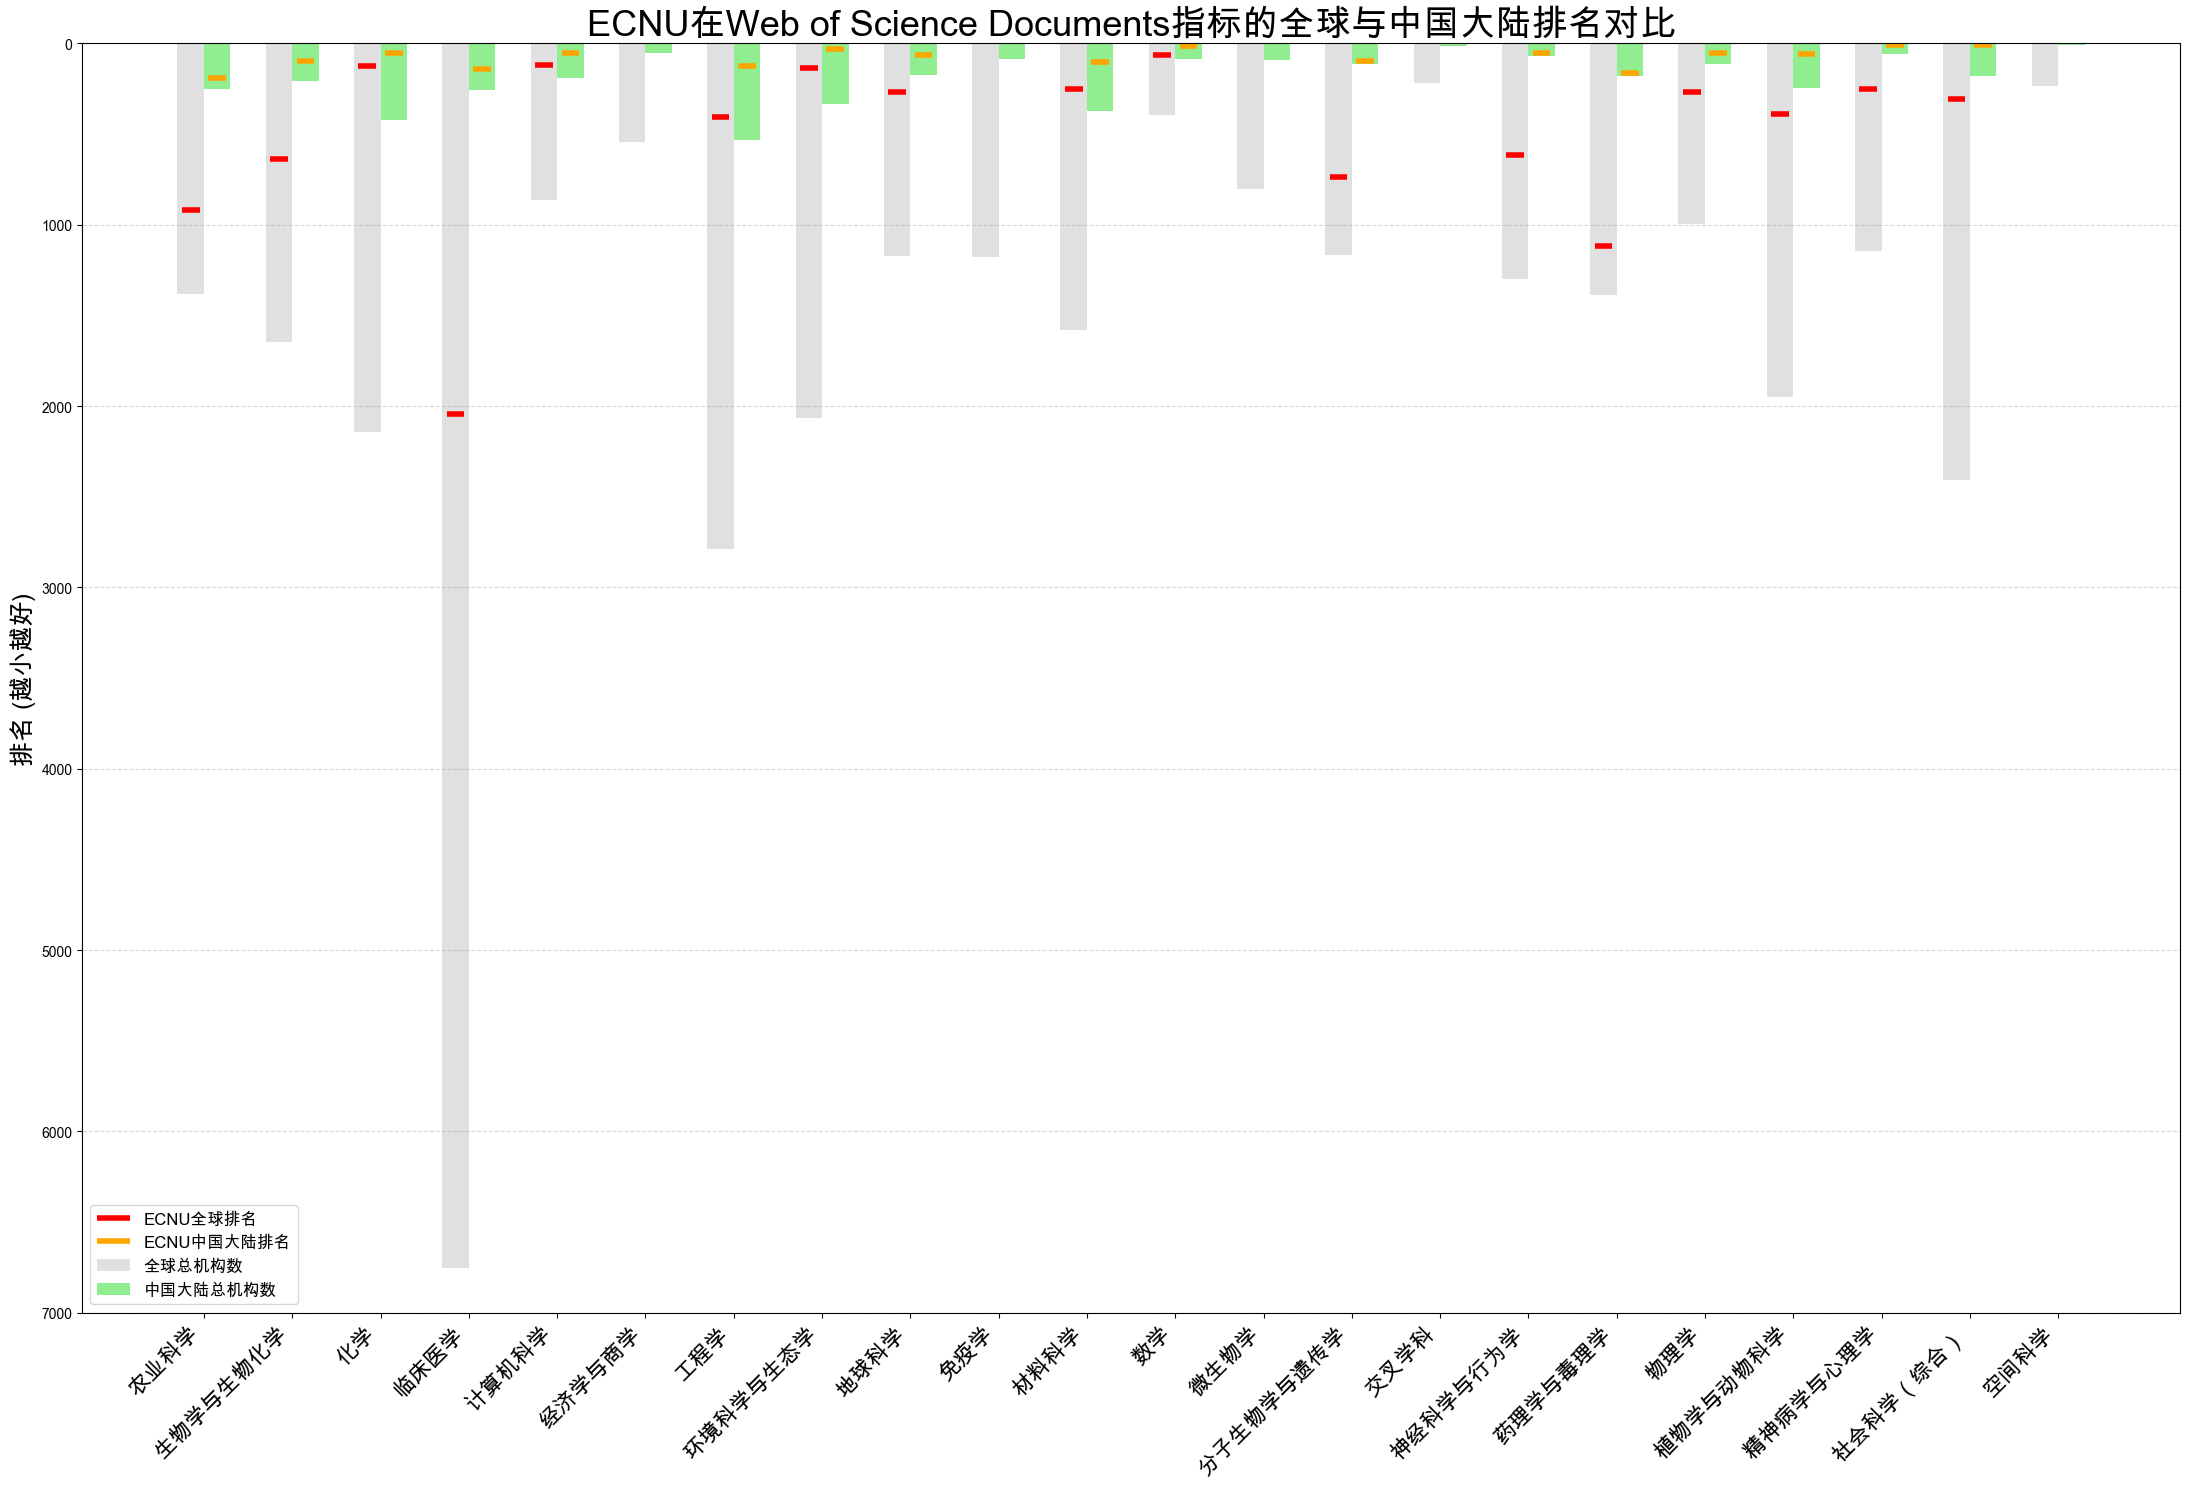


处理指标: Cites


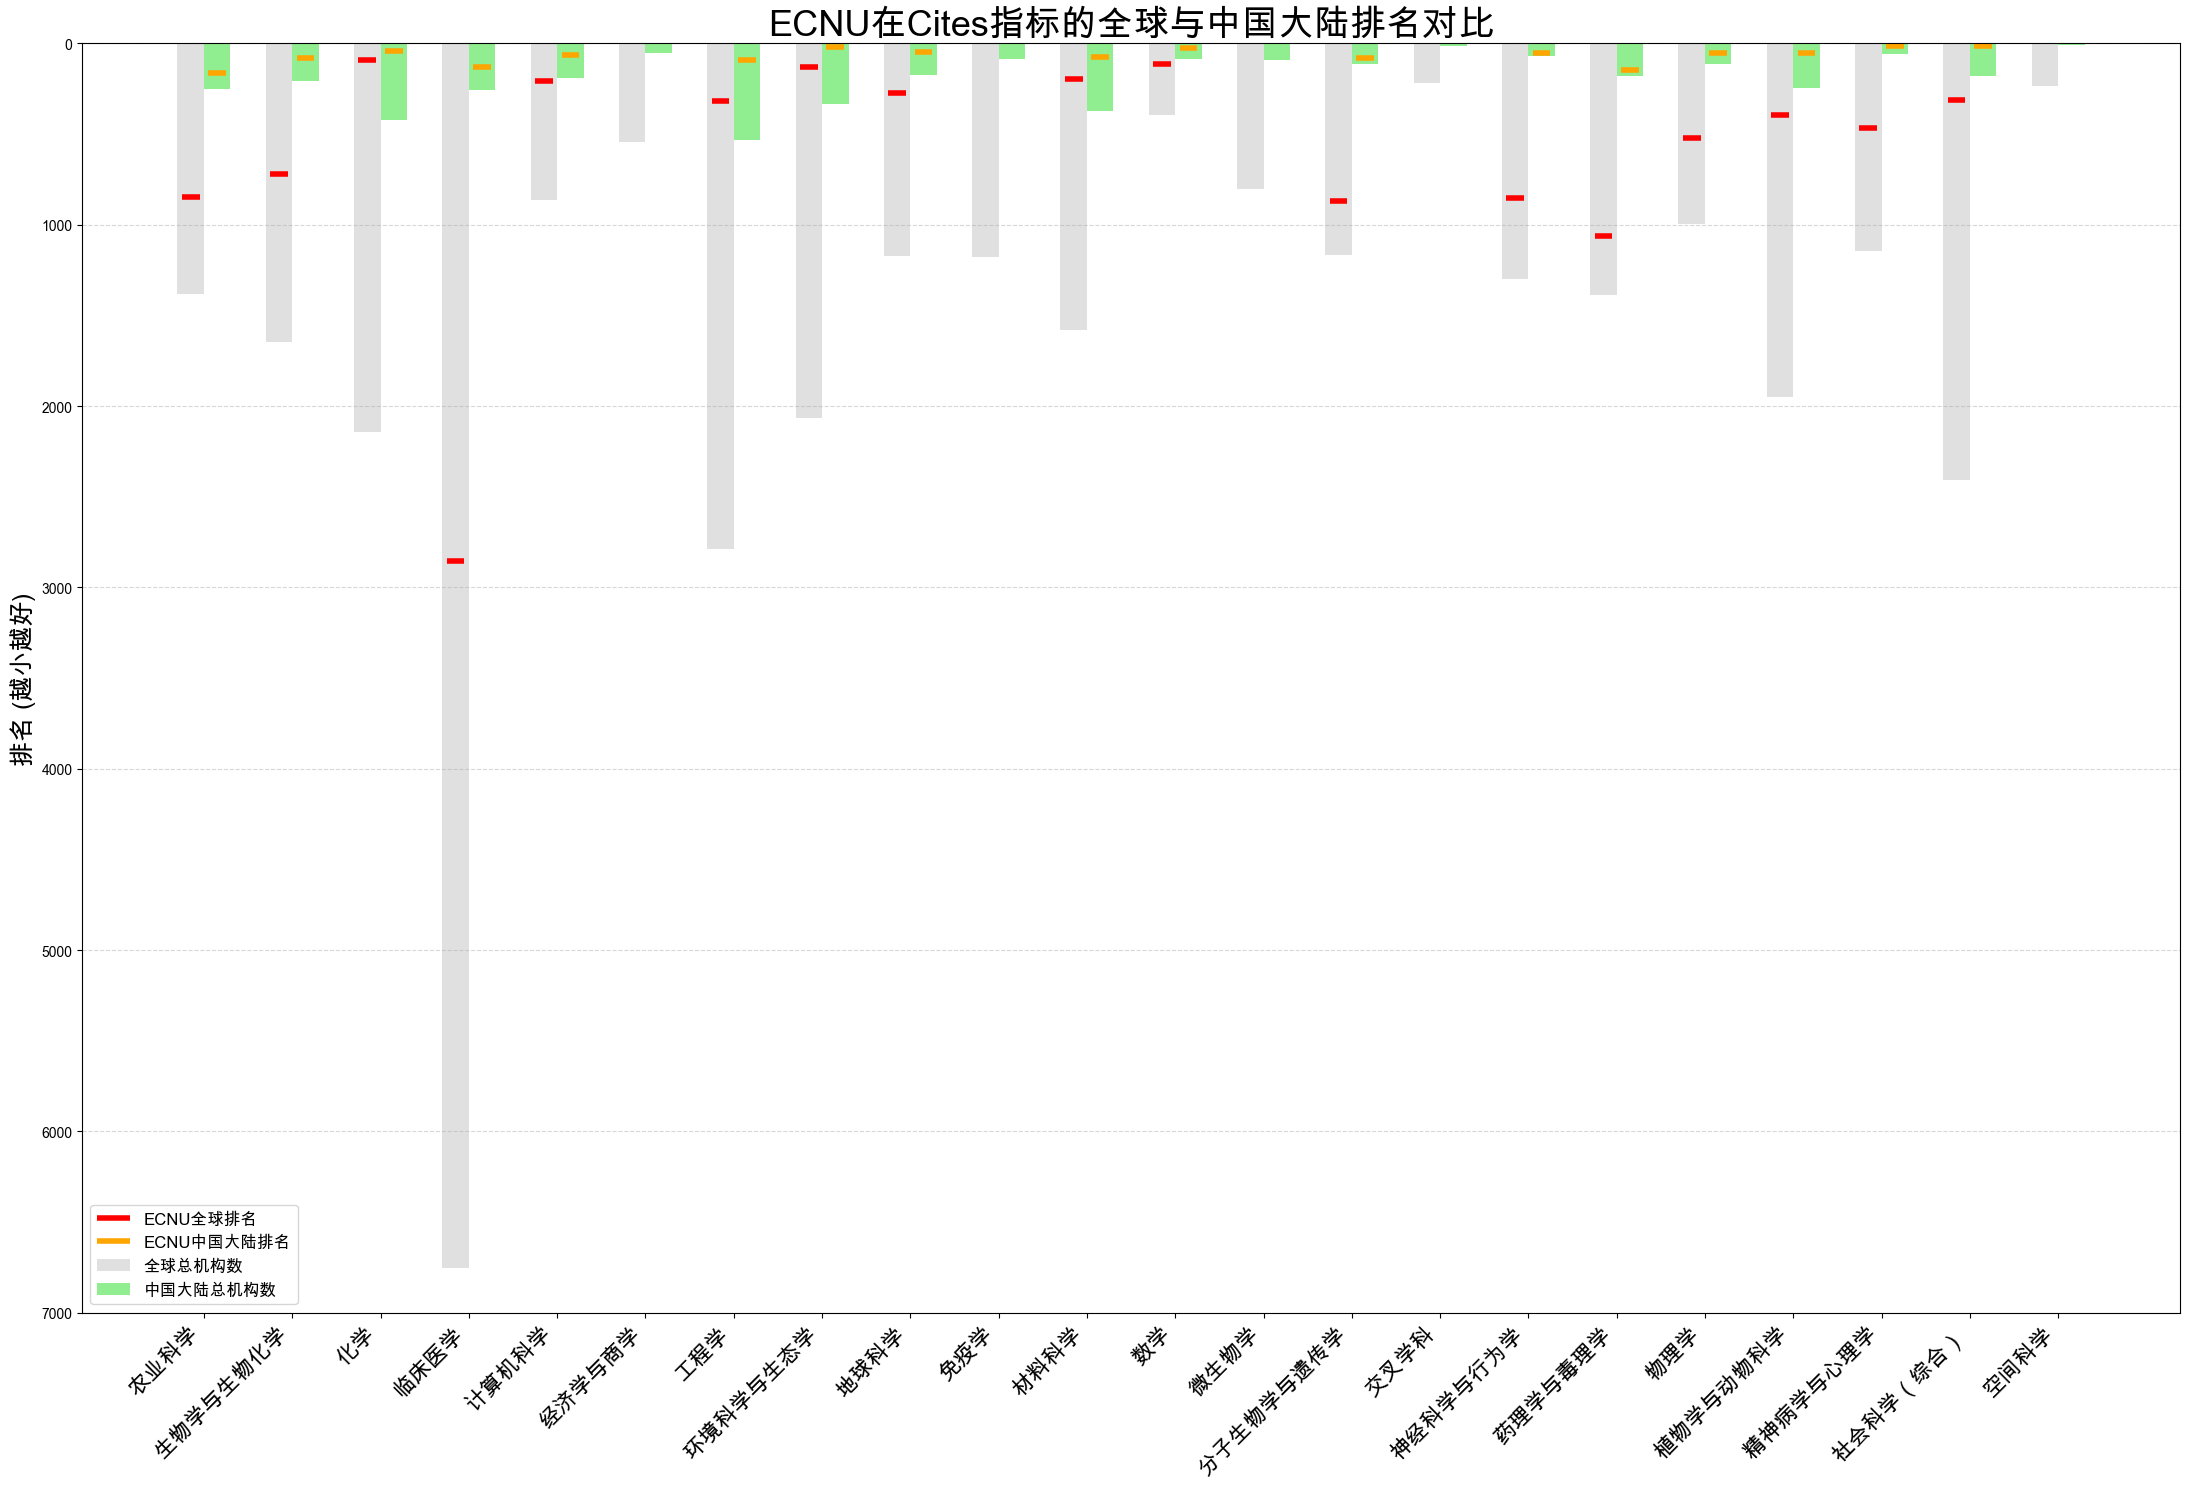


处理指标: Cites/Paper


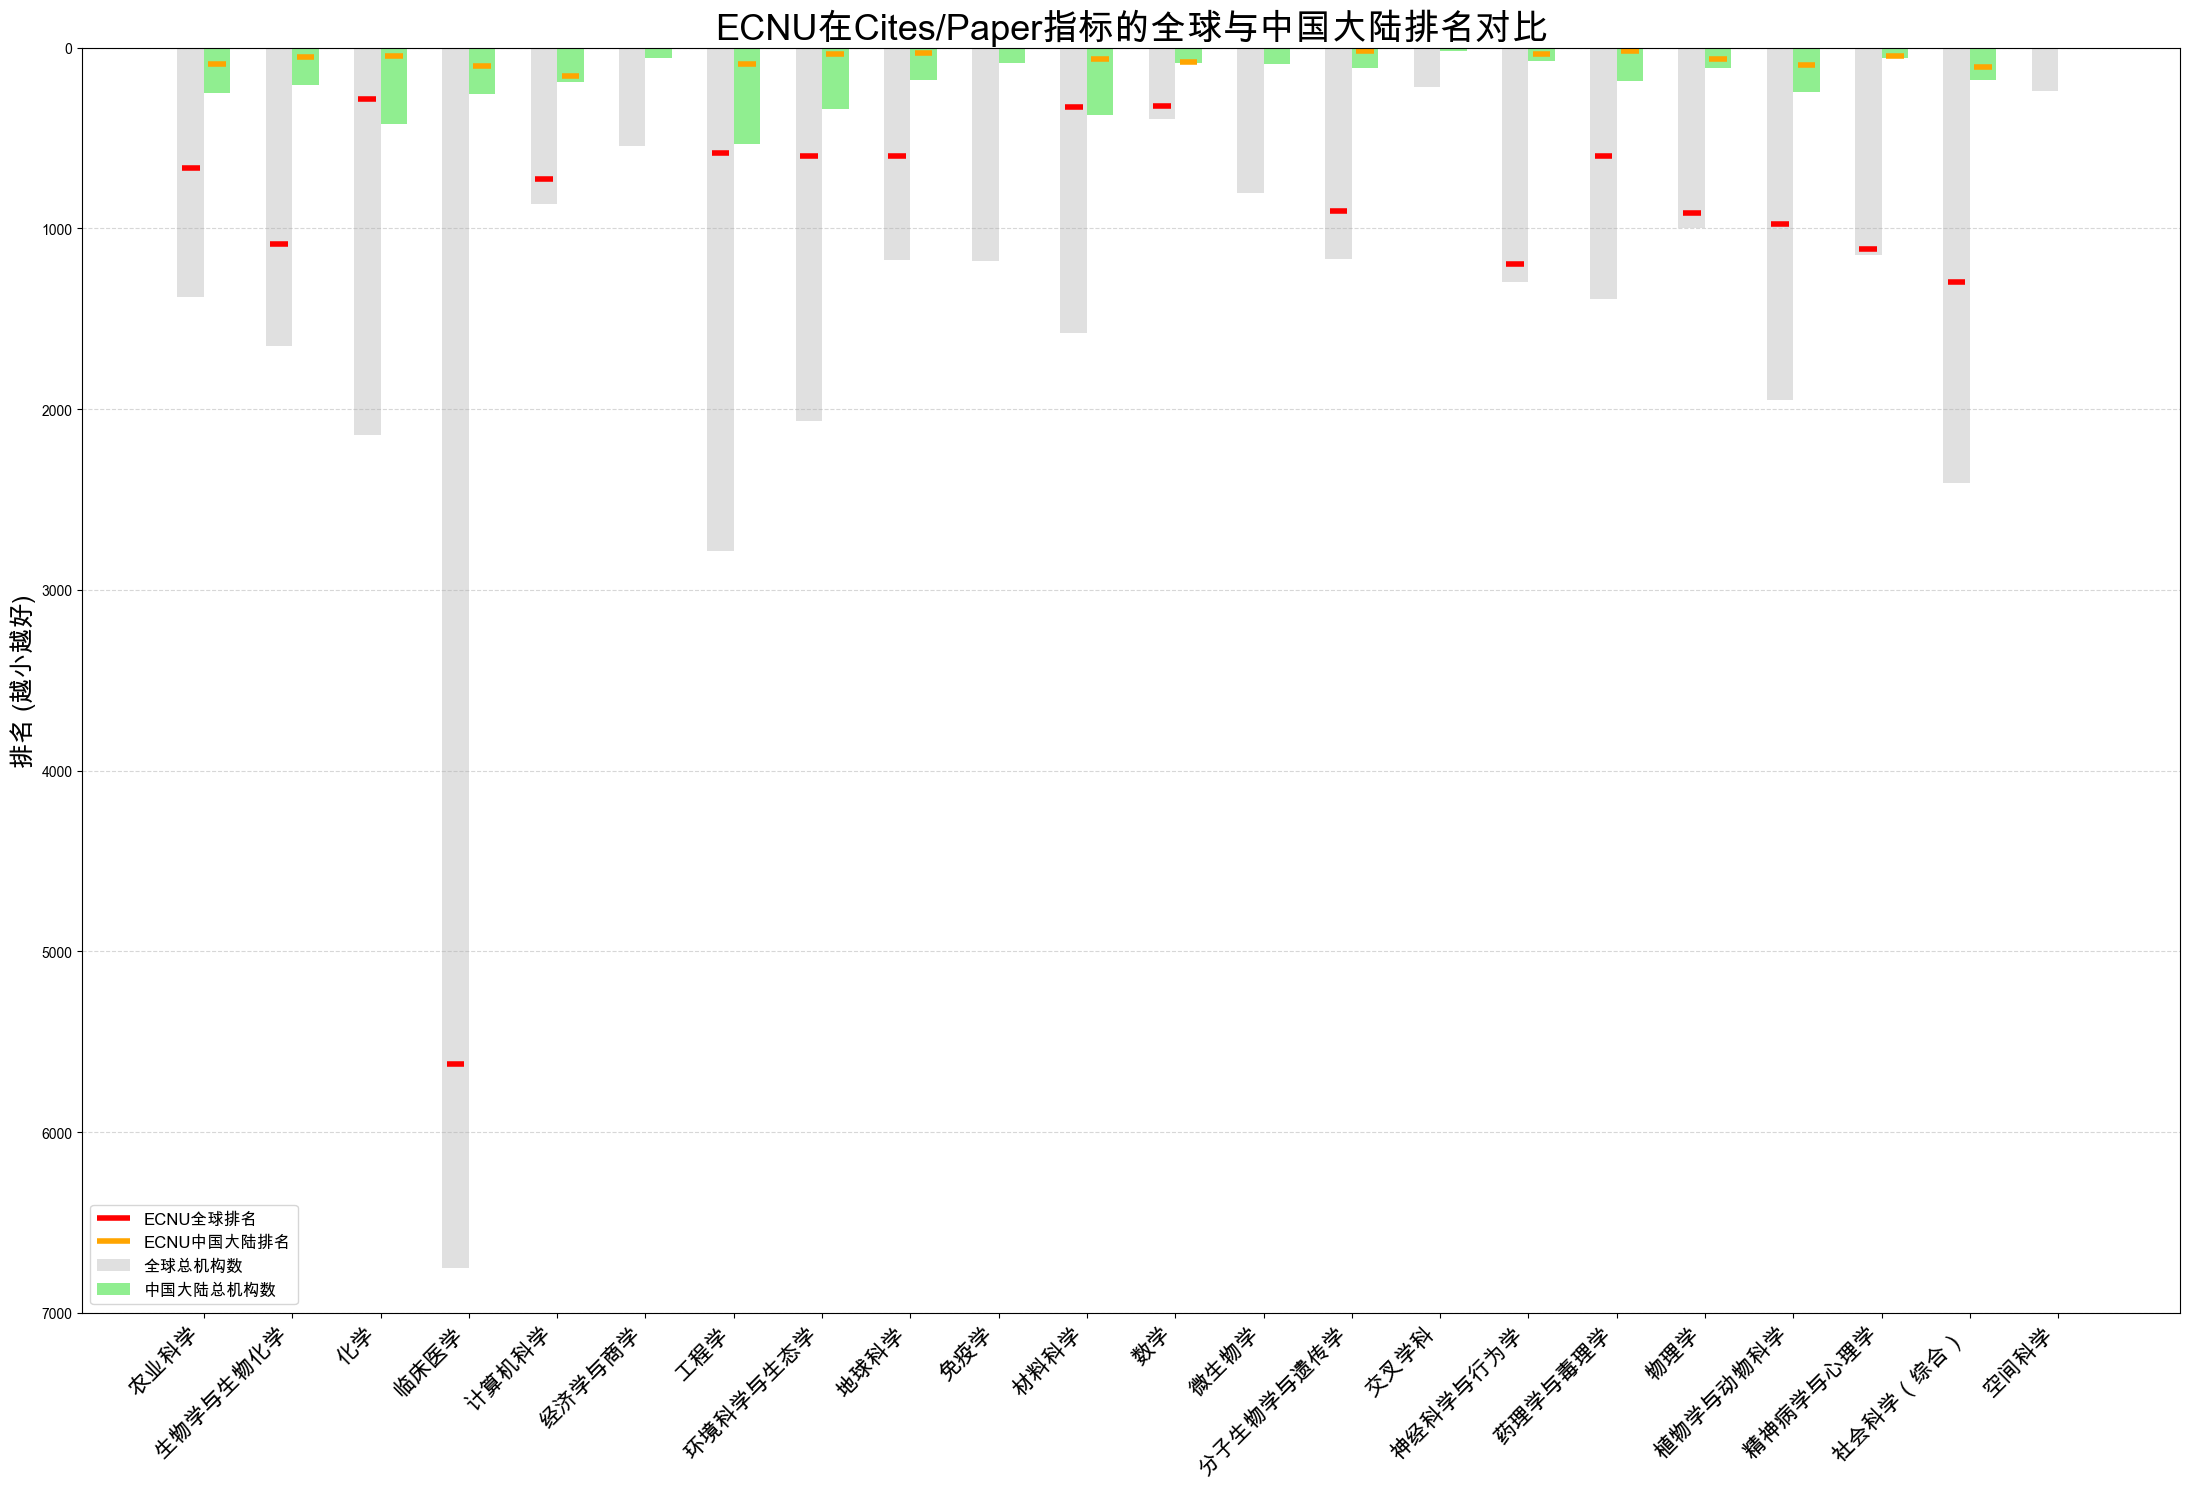


处理指标: Top Papers


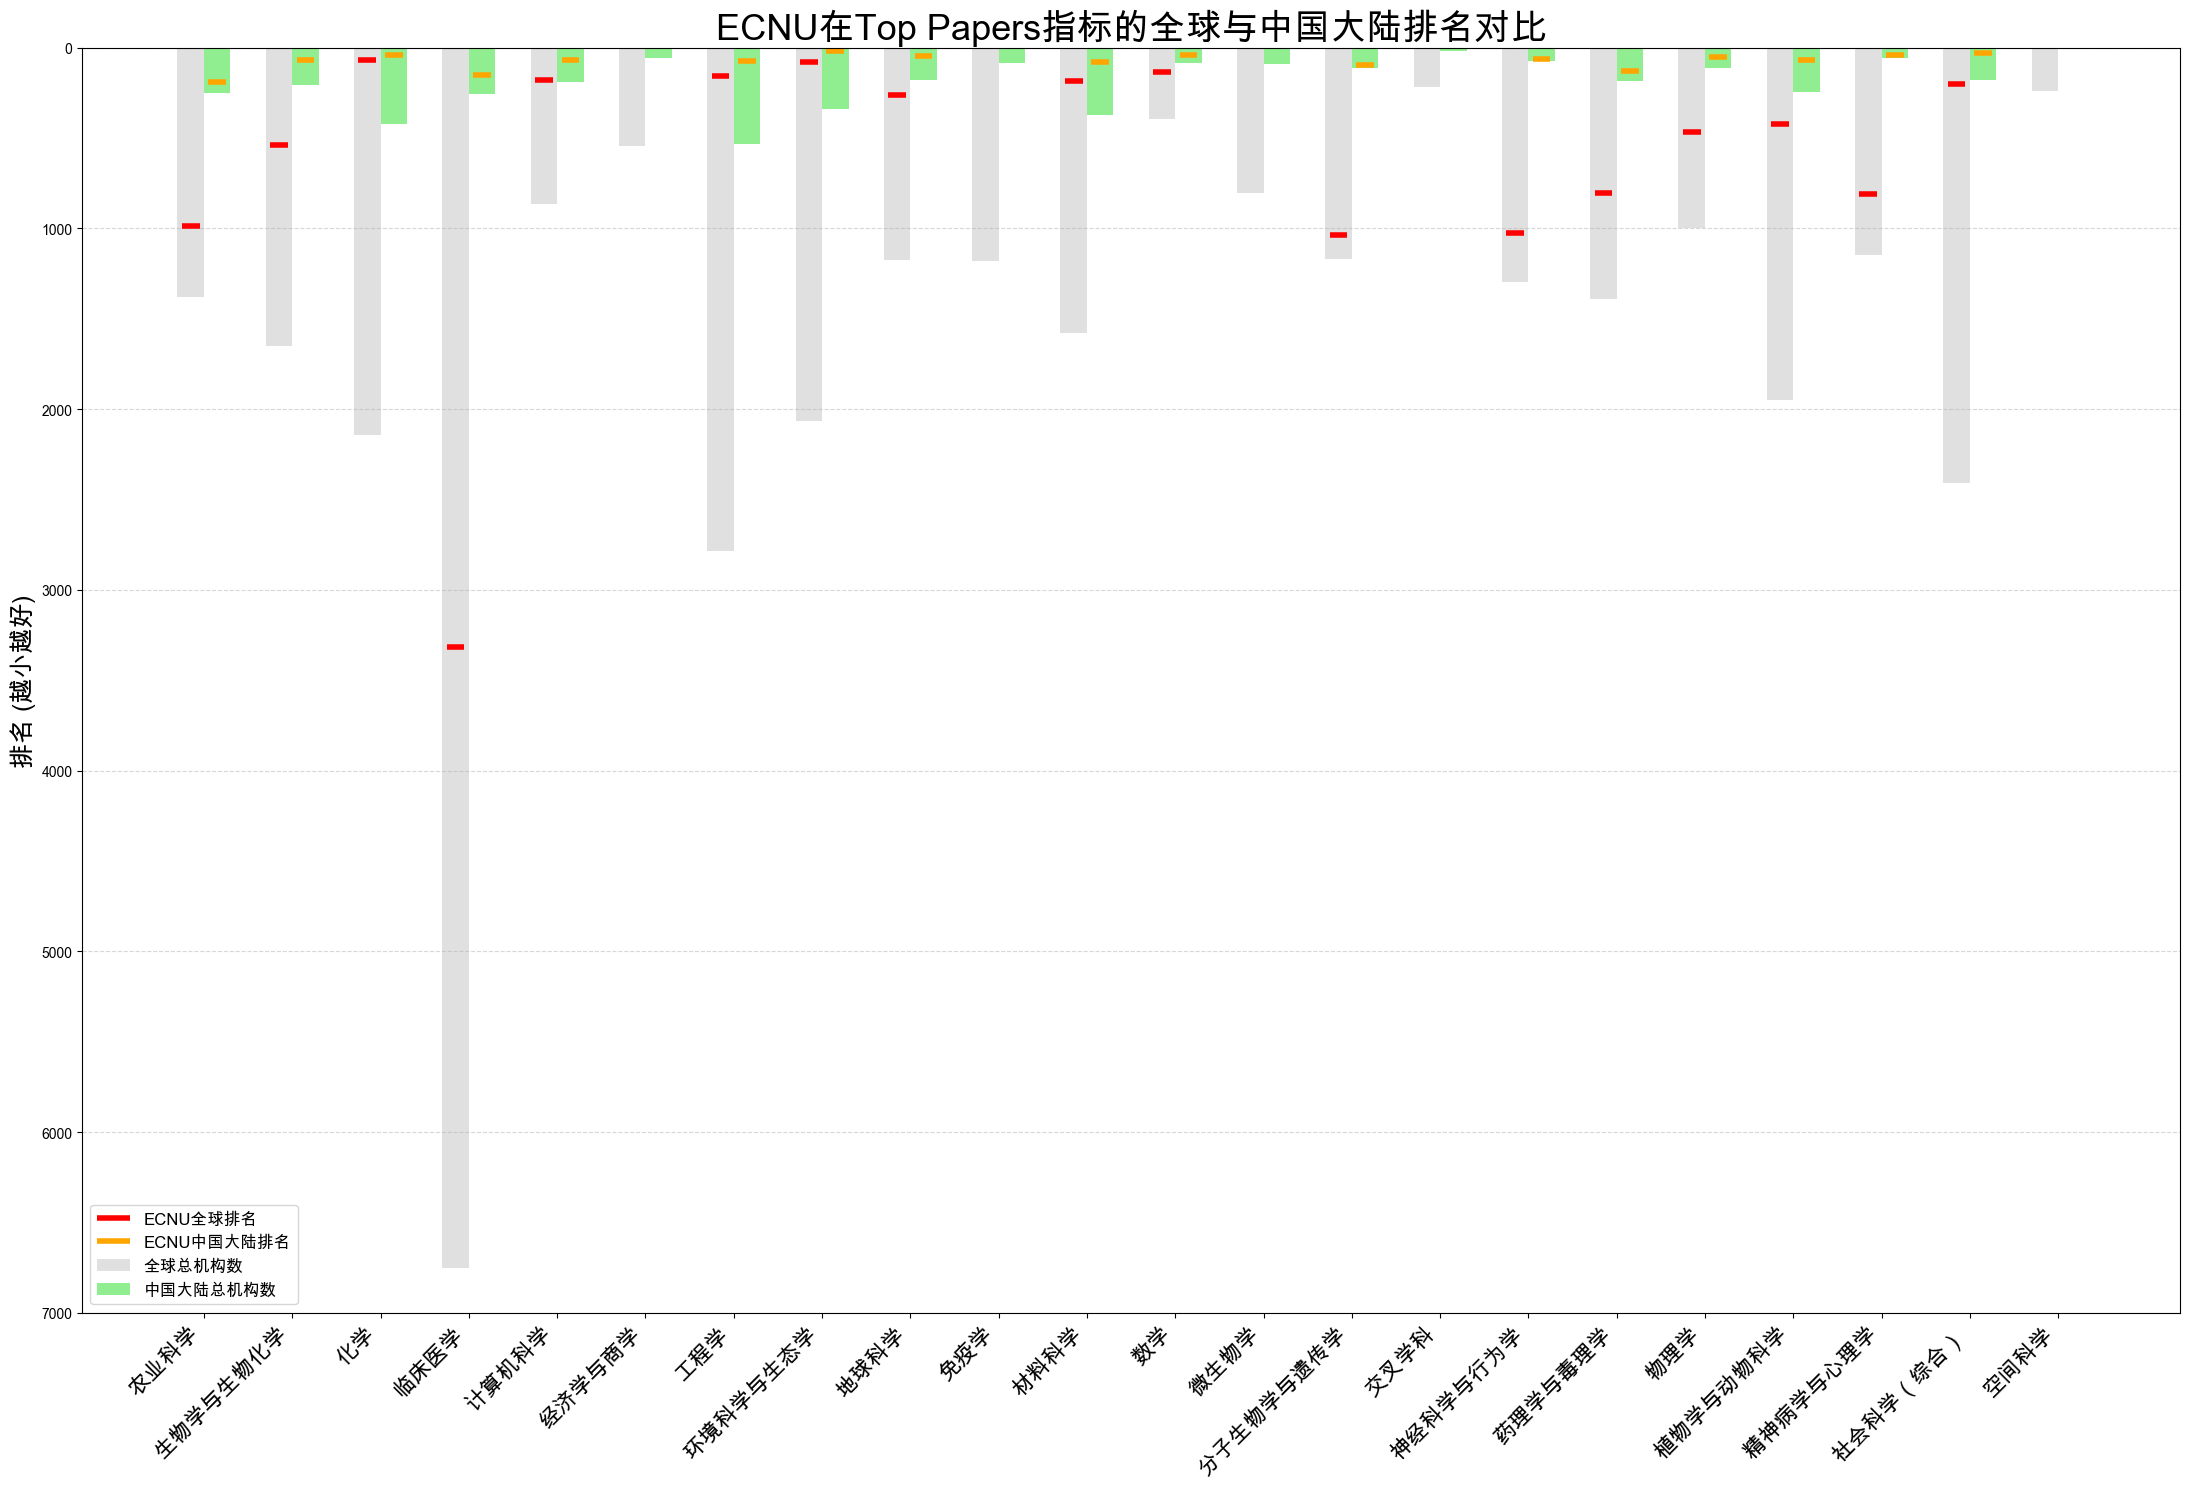

In [29]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans', 'WenQuanYi Micro Hei']
plt.rcParams['axes.unicode_minus'] = False

# 创建英文到中文的学科名称映射
field_mapping = dict(zip(academic_fields, academic_fields_zh))

# 筛选有数据的学科和缺席学科
valid_results = [r for r in results if any(r['global_rank'].values())]
absent_results = [r for r in results if not any(r['global_rank'].values())]

# 创建排名汇总表格
print("=" * 100)
print(f"{Institution_name} 各学科排名汇总表")
print("=" * 100)

print(f"\n共 {len(valid_results)} 个学科有排名数据，{len(absent_results)} 个学科未上榜")
print("\n学科名称\t\t\t\t全球排名\t\t\t\t中国大陆排名")
print("-" * 100)

for r in results:
    field_zh = field_mapping.get(r['field'], r['field'])
    field = field_zh[:20] + "..." if len(field_zh) > 20 else field_zh
    
    # 获取Web of Science Documents指标的排名作为代表，格式为 x / y
    if r['global_rank']['Web of Science Documents']:
        global_rank = f"{r['global_rank']['Web of Science Documents']}/{r['global_total']['Web of Science Documents']}"
    else:
        global_rank = f"未上榜/{r['global_total']['Web of Science Documents']}"
    
    if r['china_rank']['Web of Science Documents']:
        china_rank = f"{r['china_rank']['Web of Science Documents']}/{r['china_total']['Web of Science Documents']}"
    else:
        china_rank = f"未上榜/{r['china_total']['Web of Science Documents']}"
    
    print(f"{field:<25}\t{global_rank}\t\t\t{china_rank}")

# 可视化 - 分别显示4张大图（包含所有学科）
metrics = ['Web of Science Documents', 'Cites', 'Cites/Paper', 'Top Papers']

for metric in metrics:
    print(f"\n处理指标: {metric}")
    
    # 获取所有学科的数据
    all_subjects_data = []
    for r in results:
        field_zh = field_mapping.get(r['field'], r['field'])
        field_label = field_zh[:15] + "..." if len(field_zh) > 15 else field_zh
        
        # 获取该学科的总机构数
        global_total = r['global_total'][metric] if r['global_total'][metric] > 0 else 0
        china_total = r['china_total'][metric] if r['china_total'][metric] > 0 else 0
        
        # 获取ECNU的排名
        global_rank = r['global_rank'][metric] if r['global_rank'][metric] is not None else None
        china_rank = r['china_rank'][metric] if r['china_rank'][metric] is not None else None
        
        all_subjects_data.append({
            'field': field_label,
            'global_total': global_total,
            'china_total': china_total,
            'global_rank': global_rank,
            'china_rank': china_rank,
            'has_global_rank': global_rank is not None,
            'has_china_rank': china_rank is not None
        })
    
    # 绘制图表
    if all_subjects_data:
        plt.figure(figsize=(22, 15))  # 增加宽度以容纳更多学科
        x = np.arange(len(all_subjects_data))
        
        # 提取数据
        fields = [data['field'] for data in all_subjects_data]
        global_totals = [data['global_total'] for data in all_subjects_data]
        china_totals = [data['china_total'] for data in all_subjects_data]
        global_ranks = [data['global_rank'] for data in all_subjects_data]
        china_ranks = [data['china_rank'] for data in all_subjects_data]
        has_global_rank = [data['has_global_rank'] for data in all_subjects_data]
        has_china_rank = [data['has_china_rank'] for data in all_subjects_data]
        
        # 绘制全球总机构数的灰色竖条
        plt.bar(x, global_totals, color='#e0e0e0', width=0.3, zorder=1, label='全球总机构数')
        
        # 绘制中国大陆总机构数的浅绿色竖条（在右侧）
        plt.bar(x + 0.3, china_totals, color='#90EE90', width=0.3, zorder=1, label='中国大陆总机构数')
        
        # 绘制全球排名的红色横杠
        global_valid_x = [x[i] for i, has_rank in enumerate(has_global_rank) if has_rank]
        global_valid_ranks = [global_ranks[i] for i, has_rank in enumerate(has_global_rank) if has_rank]
        
        if global_valid_ranks:
            plt.hlines(global_valid_ranks, 
                      [pos-0.1 for pos in global_valid_x], 
                      [pos+0.1 for pos in global_valid_x], 
                      colors='red', linewidth=4, zorder=2, label='ECNU全球排名')
        
        # 绘制中国大陆排名的橙色横杠
        china_valid_x = [x[i] + 0.3 for i, has_rank in enumerate(has_china_rank) if has_rank]
        china_valid_ranks = [china_ranks[i] for i, has_rank in enumerate(has_china_rank) if has_rank]
        
        if china_valid_ranks:
            plt.hlines(china_valid_ranks, 
                      [pos-0.1 for pos in china_valid_x], 
                      [pos+0.1 for pos in china_valid_x], 
                      colors='orange', linewidth=4, zorder=2, label='ECNU中国大陆排名')
        
        # # 在未上榜学科的竖条下面显示"未上榜"
        # for i, (has_global, has_china) in enumerate(zip(has_global_rank, has_china_rank)):
        #     if not has_global:
        #         plt.text(x[i], global_totals[i] + max_total * 0.1, '未上榜', 
        #                 ha='center', va='bottom', fontsize=30, color='red', fontweight='bold')

        plt.xticks(x + 0.15, fields, rotation=45, ha='right', fontsize=16)
        plt.gca().invert_yaxis()
        
        # 自适应y轴范围
        max_total = max(max(global_totals), max(china_totals))
        plt.ylim([max_total * 1.1, 0])
        
        plt.ylabel('排名 (越小越好)', fontsize=18)
        plt.title(f'ECNU在{metric}指标的全球与中国大陆排名对比', fontsize=26, fontweight='bold')
        plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)
        plt.legend(fontsize=12)
        plt.ylim([7000, 0])
        plt.tight_layout()
        plt.show()

    else:
        plt.figure(figsize=(16, 8))
        plt.text(0.5, 0.5, f'无{metric}数据', ha='center', va='center', 
                transform=plt.gca().transAxes, fontsize=16)
        plt.title(f'ECNU在{metric}指标的排名', fontsize=16, fontweight='bold')
        plt.show()


## 3. 高排名学科统计

前100名：化学，环境科学与生态学
101-200名：计算机科学，工程学，材料科学，数学，社会科学（综合）
201-500名：地球科学，物理学，植物学与动物科学
501-1000名：农业科学，生物学与生物化学，药理学与毒理学，精神病学与心理学
其他：临床医学，分子生物学与遗传学，神经科学与行为学，空间科学，交叉学科，微生物学，经济学与商学，免疫学


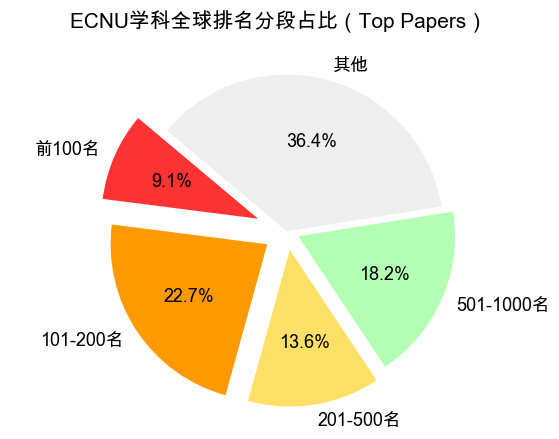

In [30]:
field_mapping = dict(zip(academic_fields, academic_fields_zh))

metrics = [
    'Top Papers'
]

sections = [
    (1, 100, "前100名"),
    (101, 200, "101-200名"),
    (201, 500, "201-500名"),
    (501, 1000, "501-1000名"),
]

explode = [0.2, 0.15, 0.12, 0.08, 0] # 每个分段的突出程度
colors = [
    '#ff3333',   # 前100名
    '#ff9900',   # 101-200名
    '#ffe066',   # 201-500名
    '#b3ffb3',   # 501-1000名
    '#eeeeee'    # 其他
]

for metric in metrics:
    section_subjects_dict = {label: [] for _, _, label in sections}
    other_subjects = []

    for r in results:
        rank = r['global_rank'][metric]
        if rank:
            found = False
            for start, end, label in sections:
                if start <= rank <= end:
                    field_zh = field_mapping.get(r['field'], r['field'])
                    section_subjects_dict[label].append((field_zh, rank))
                    found = True
                    break
            if not found:
                field_zh = field_mapping.get(r['field'], r['field'])
                other_subjects.append((field_zh, rank))

    all_fields_zh = set(field_mapping.get(f, f) for f in academic_fields)
    counted_fields_zh = set(field for subjects in section_subjects_dict.values() for field, _ in subjects)
    counted_fields_zh.update(field for field, _ in other_subjects)
    not_ranked_fields_zh = list(all_fields_zh - counted_fields_zh)

    section_counts = {label: len(section_subjects_dict[label]) for _, _, label in sections}
    section_counts['其他'] = len(other_subjects) + len(not_ranked_fields_zh)

    labels = list(section_counts.keys())
    sizes = list(section_counts.values())
    explode_plot = explode[:len(labels)]
    colors_plot = colors[:len(labels)]
    # 打印每个分段分别有哪些学科
    for label in labels:
        if label == '其他':
            print(f"{label}：", end='')
            # 其他包括未进入前1000名的学科
            other_names = [field for field, _ in other_subjects] + not_ranked_fields_zh
            print('，'.join(other_names) if other_names else '无')
        else:
            print(f"{label}：", end='')
            section_names = [field for field, _ in section_subjects_dict[label]]
            print('，'.join(section_names) if section_names else '无')

    plt.figure(figsize=(6, 4.5))
    plt.pie(
        sizes, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors_plot, 
        explode=explode_plot,
        textprops={'fontsize': 13, 'weight': 'bold'}
    )
    plt.title(f'ECNU学科全球排名分段占比（{metric}）', fontsize=15, fontweight='bold')
    plt.title(plt.gca().get_title() + '\n' , fontsize=15, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 二、学科结构分析

## 1. 学科优势度分析（波士顿矩阵法）

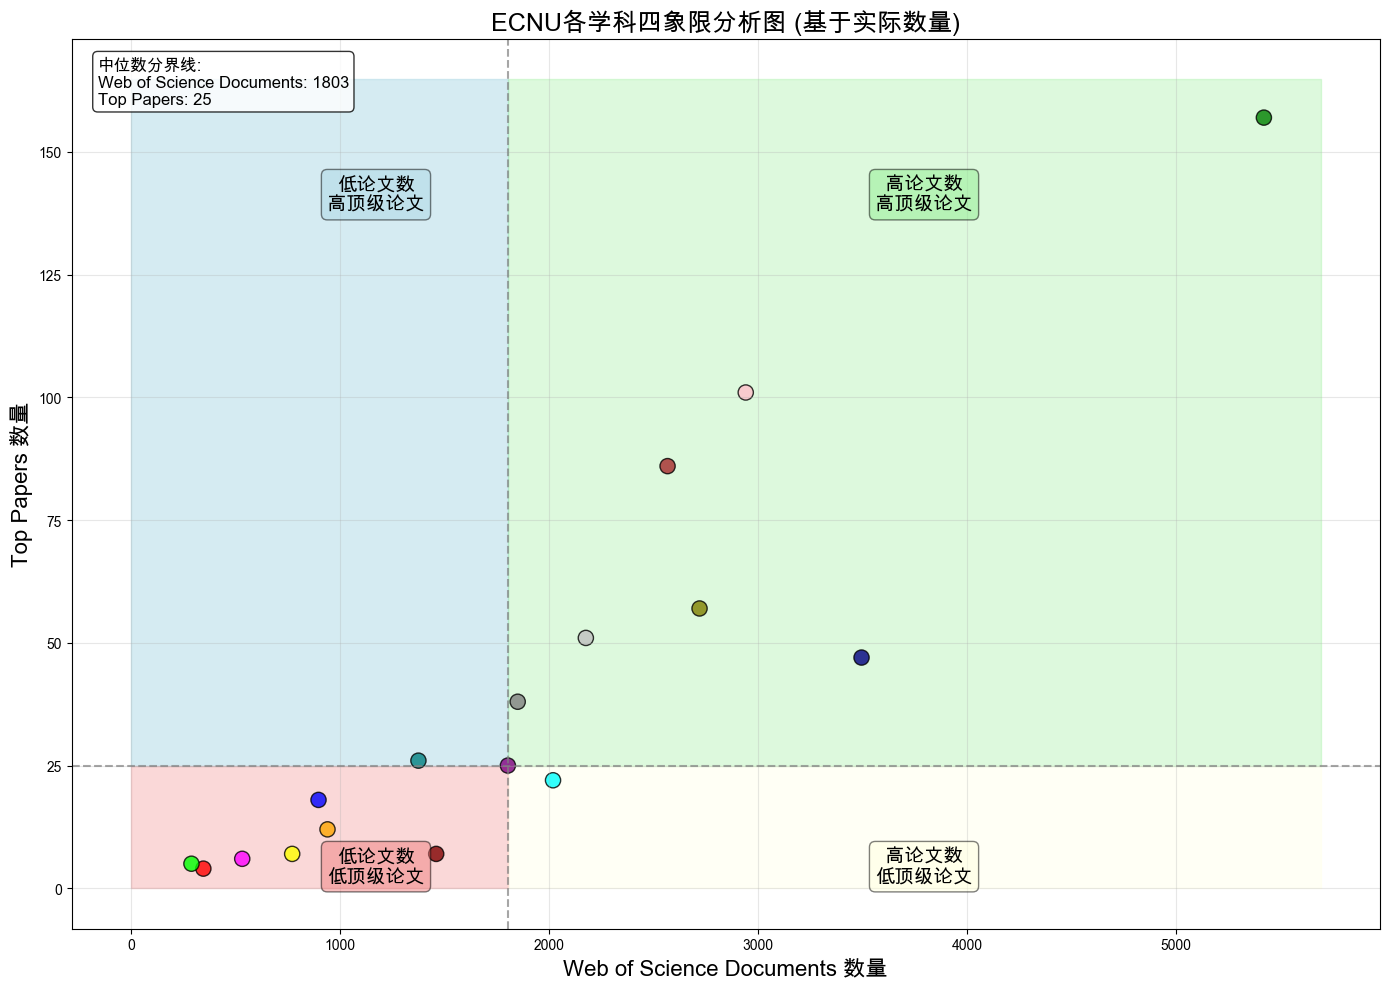

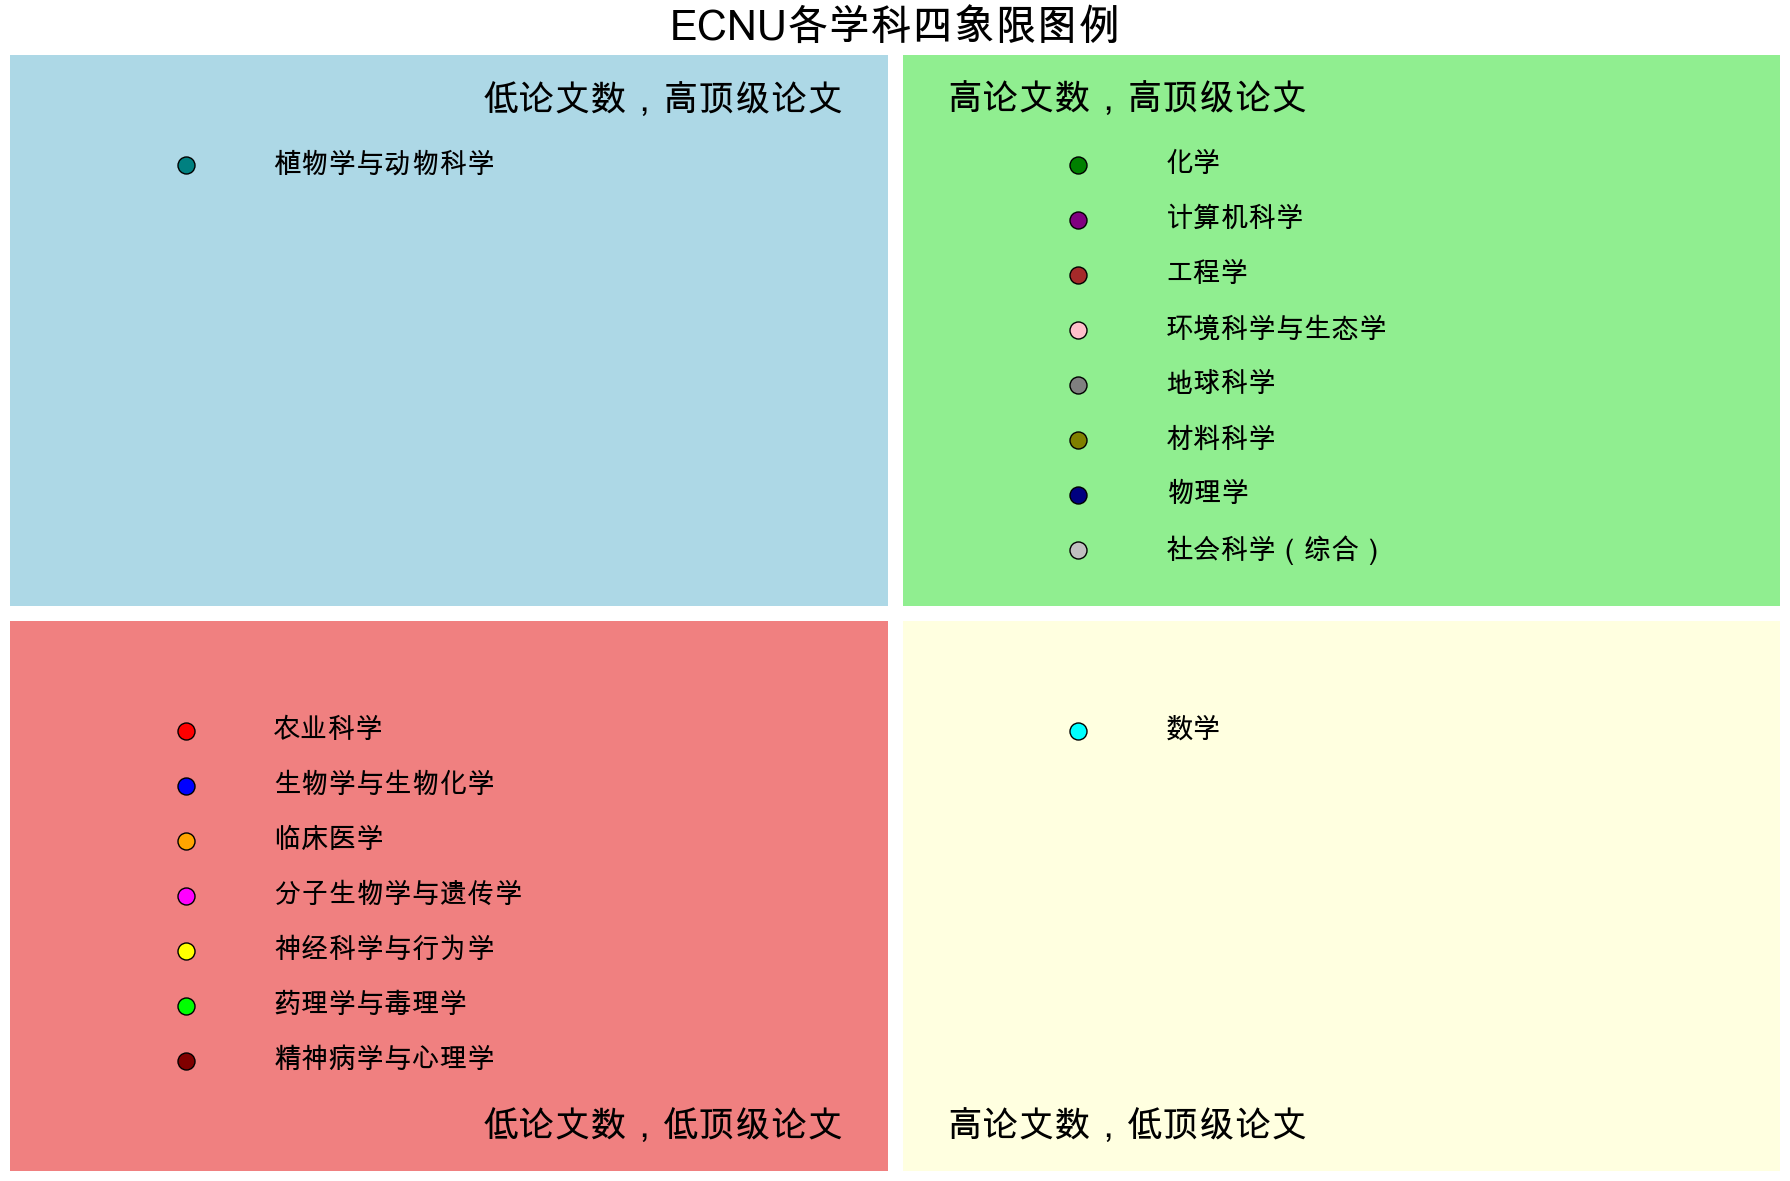

In [ ]:
# 四象限图：Web of Science Documents vs Top Papers (使用实际数量)

x_data, y_data, labels, color_list = [], [], [], []
# 颜色池，足够多
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 
          'magenta', 'yellow', 'lime', 'navy', 'teal', 'maroon', 'silver', 'gold', 'aqua', 'chocolate', 'orchid']

# 先收集所有学科，分配颜色，保证点和图例一一对应
field_names = []
for r in results:
    if r['global_rank']['Web of Science Documents'] and r['global_rank']['Top Papers']:
        field_names.append(r['field'])
field_names = list(dict.fromkeys(field_names))  # 保持顺序去重
field2color = {field: colors[i % len(colors)] for i, field in enumerate(field_names)}

for r in results:
    if r['global_rank']['Web of Science Documents'] and r['global_rank']['Top Papers']:
        field_name = r['field']
        file_path = f"csv/{[f for f in os.listdir('csv') if field_name in f and f.endswith('.csv')][0]}"
        df = pd.read_csv(file_path, skiprows=1, encoding='latin1')
        ecnu_row = df[df['Institutions'] == Institution_name]
        if not ecnu_row.empty:
            x_data.append(ecnu_row['Web of Science Documents'].iloc[0])
            y_data.append(ecnu_row['Top Papers'].iloc[0])
            labels.append(field_mapping.get(field_name, field_name))
            color_list.append(field2color[field_name])

# 计算中位数作为象限分界线
x_median = np.median(x_data)
y_median = np.median(y_data)

fig, ax = plt.subplots(figsize=(14, 10))
# 背景颜色
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_min_full = min(0, x_min)
y_min_full = min(0, y_min)
x_max_full = max(x_max, max(x_data)*1.05)
y_max_full = max(y_max, max(y_data)*1.05)

# 左上：低论文数，高顶级论文（左：0~x_median，上：y_median~最大）
ax.fill_betweenx(
    y=[y_median, y_max_full],
    x1=x_min_full,
    x2=x_median,
    color='lightblue',
    alpha=0.5,
    zorder=0
)
# 右上：高论文数，高顶级论文（右：x_median~最大，上：y_median~最大）
ax.fill_betweenx(
    y=[y_median, y_max_full],
    x1=x_median,
    x2=x_max_full,
    color='lightgreen',
    alpha=0.3,
    zorder=0
)
# 左下：低论文数，低顶级论文（左：0~x_median，下：0~y_median）
ax.fill_betweenx(
    y=[y_min_full, y_median],
    x1=x_min_full,
    x2=x_median,
    color='lightcoral',
    alpha=0.3,
    zorder=0
)
# 右下：高论文数，低顶级论文（右：x_median~最大，下：0~y_median）
ax.fill_betweenx(
    y=[y_min_full, y_median],
    x1=x_median,
    x2=x_max_full,
    color='lightyellow',
    alpha=0.3,
    zorder=0
)

# 画散点，颜色与field2color一一对应
sc = ax.scatter(x_data, y_data, c=color_list, s=120, alpha=0.8, edgecolors='black', linewidth=1)

# 分类学科到四个象限，颜色与field2color一一对应
quadrants = {
    'top_right': [],  # 高论文数，高顶级论文
    'top_left': [],   # 低论文数，高顶级论文  
    'bottom_right': [], # 高论文数，低顶级论文
    'bottom_left': []   # 低论文数，低顶级论文
}

for x, y, label, color in zip(x_data, y_data, labels, color_list):
    if x >= x_median and y >= y_median:
        quadrants['top_right'].append((x, y, label, color))
    elif x < x_median and y >= y_median:
        quadrants['top_left'].append((x, y, label, color))
    elif x >= x_median and y < y_median:
        quadrants['bottom_right'].append((x, y, label, color))
    else:
        quadrants['bottom_left'].append((x, y, label, color))

# 象限分界线
ax.axvline(x=x_median, color='gray', linestyle='--', alpha=0.7)
ax.axhline(y=y_median, color='gray', linestyle='--', alpha=0.7)
# 象限标签
ax.text(x_median*0.65, max(y_data)*0.9, '低论文数\n高顶级论文', ha='center', va='center', 
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5), fontsize=14)
ax.text(max(x_data)*0.7, max(y_data)*0.9, '高论文数\n高顶级论文', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5), fontsize=14)
ax.text(x_median*0.65, min(y_data)*1.1, '低论文数\n低顶级论文', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5), fontsize=14)
ax.text(max(x_data)*0.7, min(y_data)*1.1, '高论文数\n低顶级论文', ha='center', va='center',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5), fontsize=14)
ax.set_xlabel('Web of Science Documents 数量', fontsize=16)
ax.set_ylabel('Top Papers 数量', fontsize=16)
ax.set_title('ECNU各学科四象限分析图 (基于实际数量)', fontsize=18, fontweight='bold')
ax.grid(True, alpha=0.3)
# 添加统计信息
ax.text(0.02, 0.98, f'中位数分界线:\nWeb of Science Documents: {x_median:.0f}\nTop Papers: {y_median:.0f}', 
         transform=ax.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# 创建图例
fig_legend, axes = plt.subplots(2, 2, figsize=(18, 12))
fig_legend.suptitle('ECNU各学科四象限图例', fontsize=30, fontweight='bold')
# 象限名称和颜色
quadrant_info = [
    ('低论文数，高顶级论文', quadrants['top_left'], 'lightblue'),
    ('高论文数，高顶级论文', quadrants['top_right'], 'lightgreen'),
    ('低论文数，低顶级论文', quadrants['bottom_left'], 'lightcoral'),
    ('高论文数，低顶级论文', quadrants['bottom_right'], 'lightyellow')
]

for idx, (title, subjects, bg_color) in enumerate(quadrant_info):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]
    
    # 设置背景色
    ax.set_facecolor(bg_color)
    
    # 根据象限位置显示标题
    if idx == 0:  # 右上角
        ax.text(0.95, 0.95, title, transform=ax.transAxes, ha='right', va='top', 
                fontsize=26, fontweight='bold', color='black')
    elif idx == 1:  # 左上角
        ax.text(0.05, 0.95, title, transform=ax.transAxes, ha='left', va='top', 
                fontsize=26, fontweight='bold', color='black')
    elif idx == 2:  # 右下角
        ax.text(0.95, 0.05, title, transform=ax.transAxes, ha='right', va='bottom', 
                fontsize=26, fontweight='bold', color='black')
    else:  # 左下角
        ax.text(0.05, 0.05, title, transform=ax.transAxes, ha='left', va='bottom', 
                fontsize=26, fontweight='bold', color='black')
    
    if subjects:
        # 显示该象限的学科，颜色与field2color一一对应
        for i, (x, y, label, color) in enumerate(subjects):
            ax.scatter([0.2], [0.8 - i*0.1], c=[color], s=150, edgecolors='black', linewidth=1, 
                      transform=ax.transAxes)
            ax.text(0.3, 0.8 - i*0.1, label, fontsize=20, va='center', ha='left',
                   transform=ax.transAxes)
    else:
        ax.text(0.5, 0.5, '无学科', ha='center', va='center', fontsize=20, 
                transform=ax.transAxes, color='gray')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# 三、对标分析

## 1. 获取数据

In [48]:
# 定义5个大学
target_universities = [
    'EAST CHINA NORMAL UNIVERSITY',
    'SHANGHAI JIAO TONG UNIVERSITY',
    'FUDAN UNIVERSITY', 
    'BEIJING NORMAL UNIVERSITY',
    'XIAMEN UNIVERSITY'
]
universities_short = ['ECNU', 'SJTU', 'FDU', 'BNU', 'XMU']

# 定义4个指标
indicators = ['Web of Science Documents', 'Cites', 'Cites/Paper', 'Top Papers']

csv_files = [f for f in os.listdir('csv') if f.endswith('.csv') and not f.startswith('0-ALL')]
csv_files.sort(key=lambda x: int(x.split('-')[0]))  # 按学科编号排序

# 初始化三维数组：大学数量 × 学科数量 × 指标数量
data_matrix = np.full((len(target_universities), len(csv_files), len(indicators)), np.nan, dtype=float)

# 读取每个学科文件
for subject_idx, filename in enumerate(csv_files):
    # 读取CSV文件
    df = pd.read_csv(f'csv/{filename}', skiprows=1, encoding='latin1')
    
    # 为每个目标大学查找数据
    for univ_idx, university in enumerate(target_universities):
        univ_data = df[df['Institutions'] == university]
        # 直接提取4个指标的数量
        for indicator_idx, indicator in enumerate(indicators):
            if indicator in df.columns:
                value = univ_data[indicator].iloc[0] if not univ_data.empty else np.nan
                try:
                    data_matrix[univ_idx, subject_idx, indicator_idx] = float(value)
                except (ValueError, TypeError):
                    data_matrix[univ_idx, subject_idx, indicator_idx] = np.nan

print(f"\n数据矩阵形状: {data_matrix.shape}")
print(f"保存了{len(target_universities)}个大学，{len(csv_files)}个学科，{len(indicators)}个指标的数据")


数据矩阵形状: (5, 22, 4)
保存了5个大学，22个学科，4个指标的数据


## 2. 与头部高校各学科 Top Papers 数量 与 Top Papers 占比对比

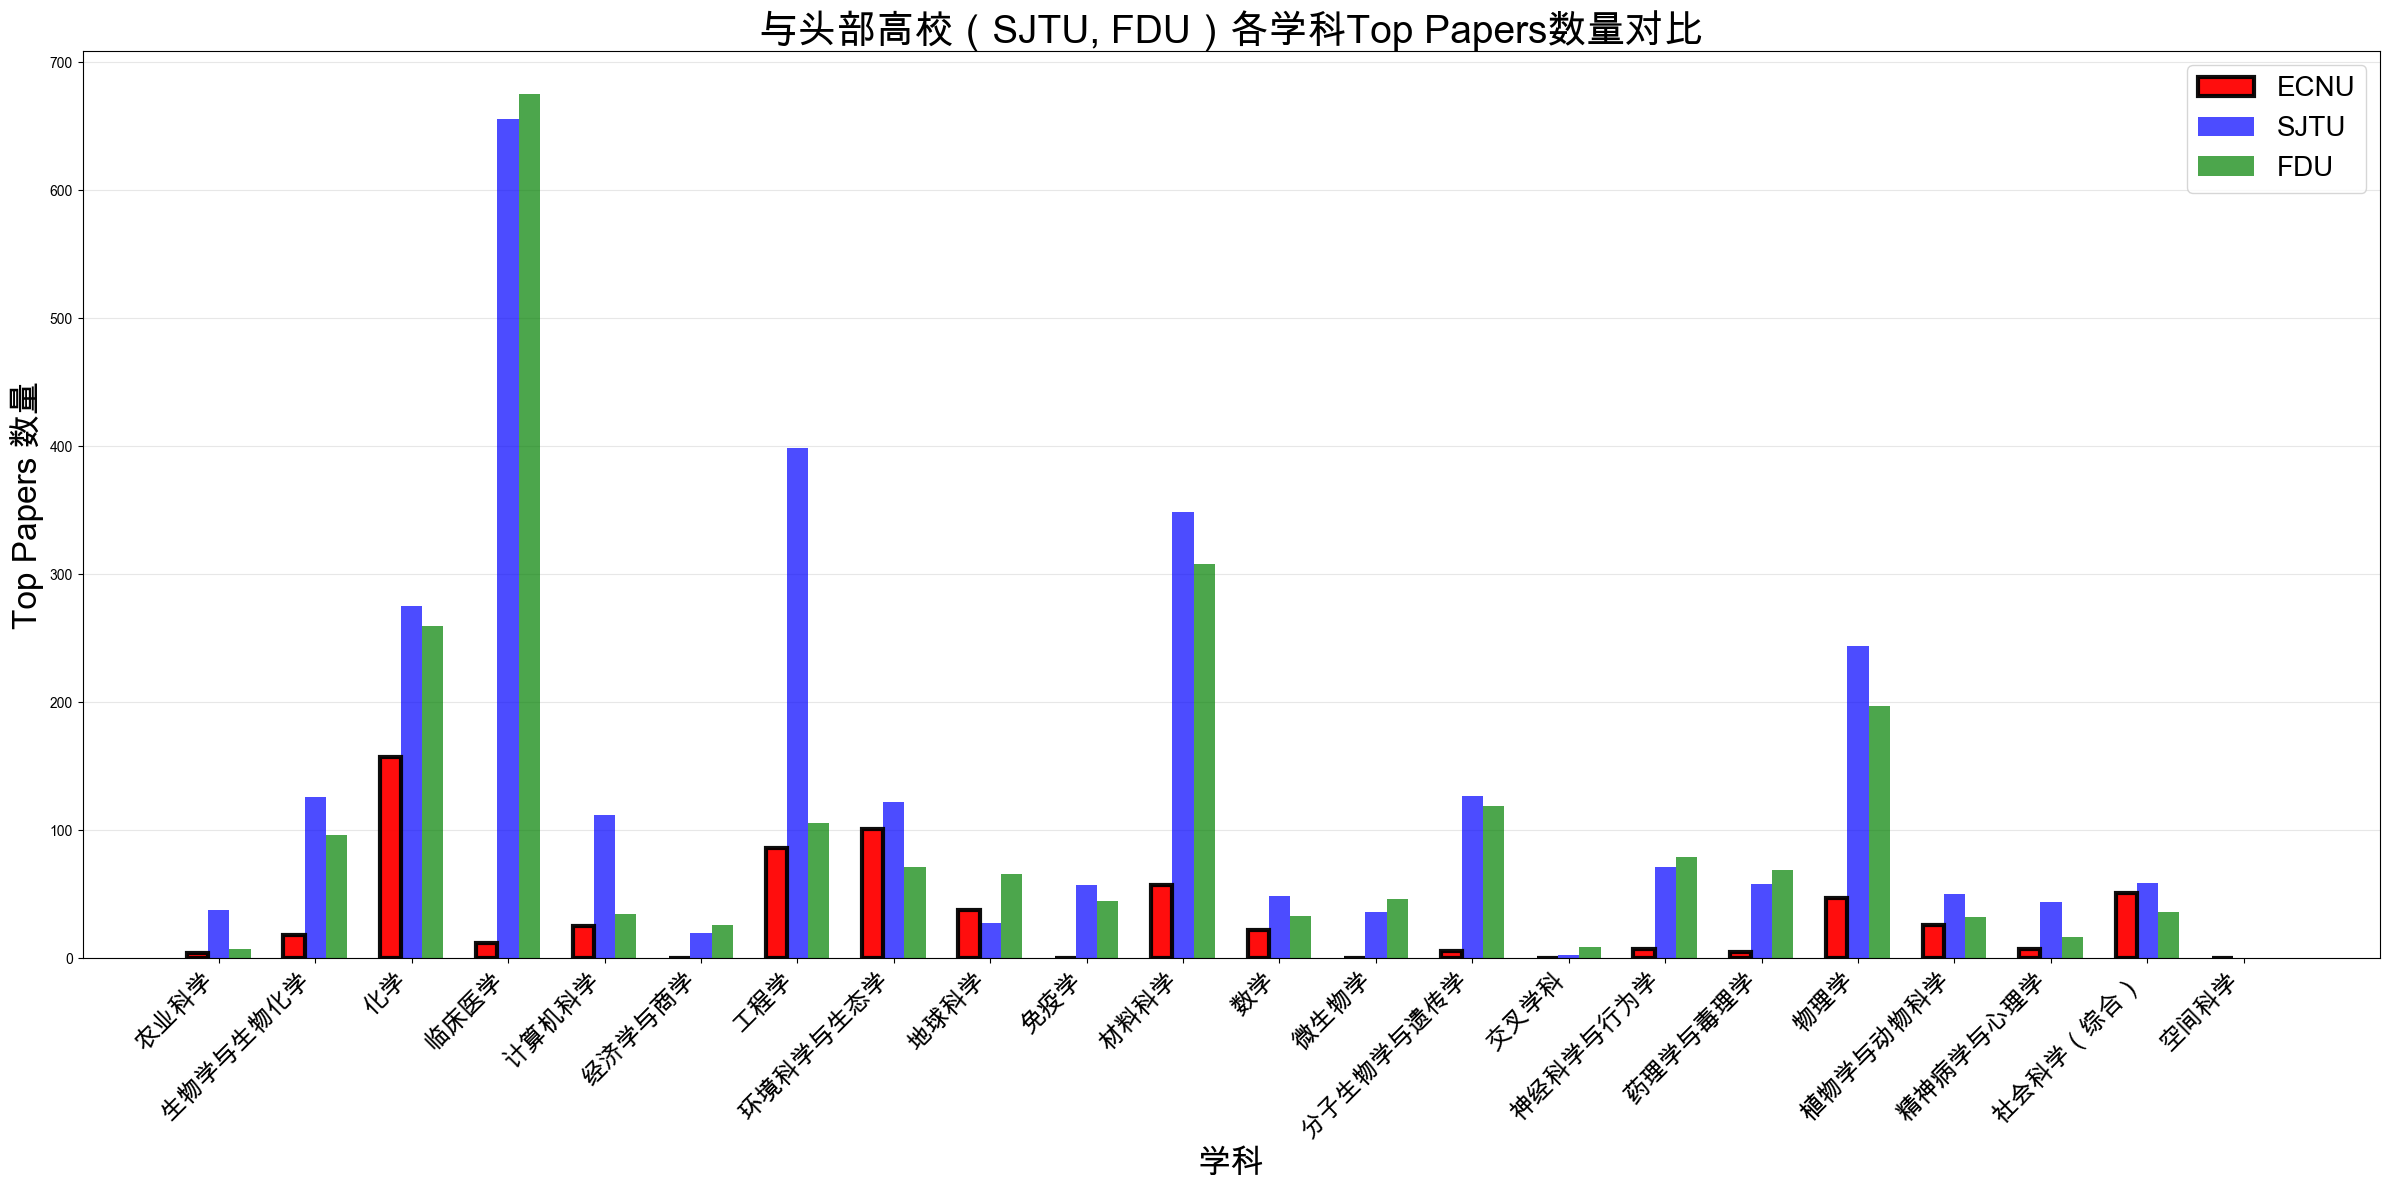

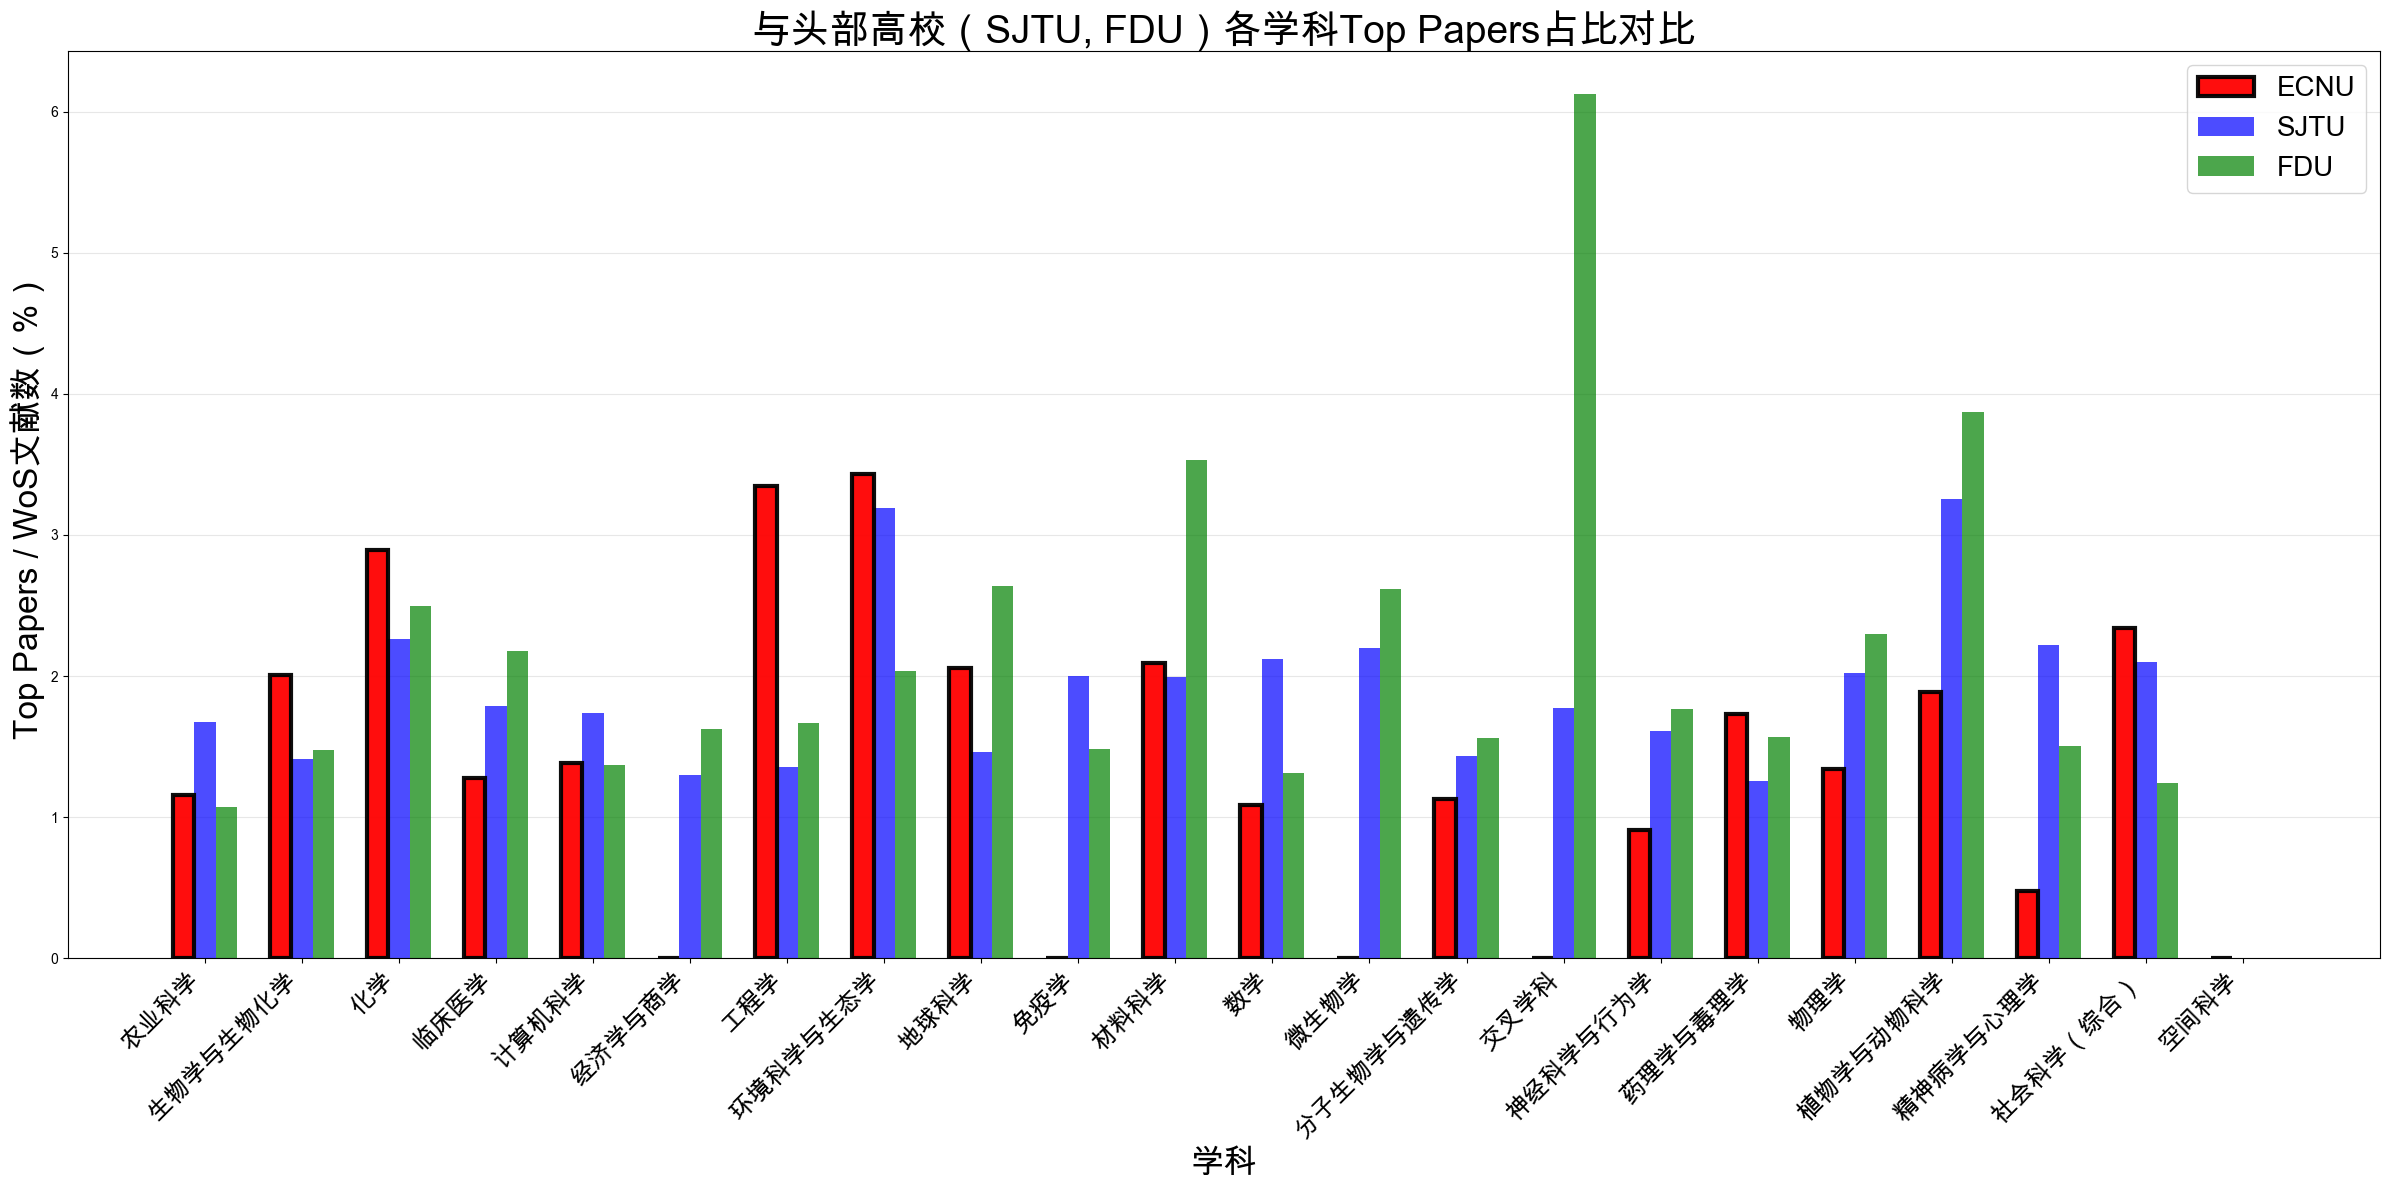

In [59]:
# Top Papers 数量与占比数据准备
top_papers_data = data_matrix[:, :, 3]  # shape: 大学数 × 学科数
wos_docs_data = data_matrix[:, :, 0]    # Web of Science Documents 数量
with np.errstate(divide='ignore', invalid='ignore'):
    ratio_data = np.where(wos_docs_data == 0, np.nan, top_papers_data / wos_docs_data * 100)

head_indices = [0, 1, 2]  # 选择 i = 0,1,2
head_universities_short = [universities_short[i] for i in head_indices]
head_colors = ['red', 'blue', 'green']
x = np.arange(len(academic_fields_zh))
width = 0.22

def plot_bar_compare(data_matrix, indices, universities_short, colors, ylabel, title, value_fmt=None):
    fig, ax = plt.subplots(figsize=(24, 12))
    for idx, (i, univ_name, color) in enumerate(zip(indices, universities_short, colors)):
        data = np.nan_to_num(data_matrix[i], nan=0)
        if idx == 0:
            bars = ax.bar(x + idx * width, data, width, label=univ_name, color=color, alpha=0.95, linewidth=2.5, edgecolor='black', zorder=3)
            for bar in bars:
                bar.set_linewidth(3)
                bar.set_edgecolor('black')
        else:
            ax.bar(x + idx * width, data, width, label=univ_name, color=color, alpha=0.7, linewidth=1.2, zorder=2)
    ax.set_xlabel('学科', fontsize=24, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=24, fontweight='bold')
    ax.set_title(title, fontsize=28, fontweight='bold')
    ax.set_xticks(x + width)
    ax.set_xticklabels(academic_fields_zh, rotation=45, ha='right', fontsize=18, fontweight='bold')
    ax.legend(fontsize=20)
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Top Papers 数量对比
plot_bar_compare(
    top_papers_data,
    head_indices,
    head_universities_short,
    head_colors,
    ylabel='Top Papers 数量',
    title='与头部高校（SJTU, FDU）各学科Top Papers数量对比'
)

# Top Papers 占比对比
plot_bar_compare(
    ratio_data,
    head_indices,
    head_universities_short,
    head_colors,
    ylabel='Top Papers / WoS文献数（%）',
    title='与头部高校（SJTU, FDU）各学科Top Papers占比对比',
    value_fmt=lambda v: f'{v:.1f}'
)
# print("学科名称列表：")
# print(academic_fields_zh)
# print("头部高校Top Papers数量具体数值：")
# for idx, univ_name in zip(head_indices, head_universities_short):
#     values = top_papers_data[idx]
#     values_str = [f"{int(v)}" if not np.isnan(v) else "NaN" for v in values]
#     print(f"{univ_name}: {values_str}")
# print("WoS文献总数具体数值：")
# for idx, univ_name in zip(head_indices, head_universities_short):
#     values = wos_docs_data[idx]
#     values_str = [f"{int(v)}" if not np.isnan(v) else "NaN" for v in values]
#     print(f"{univ_name}: {values_str}")
# print("头部高校Top Papers占比具体数值（%）：")
# for idx, univ_name in zip(head_indices, head_universities_short):
#     values = ratio_data[idx]
#     values_str = [f"{v:.2f}" if not np.isnan(v) else "NaN" for v in values]
#     print(f"{univ_name}: {values_str}")


## 3. 与近水平高校各学科 Top Papers 数量 与 Top Papers 占比对比

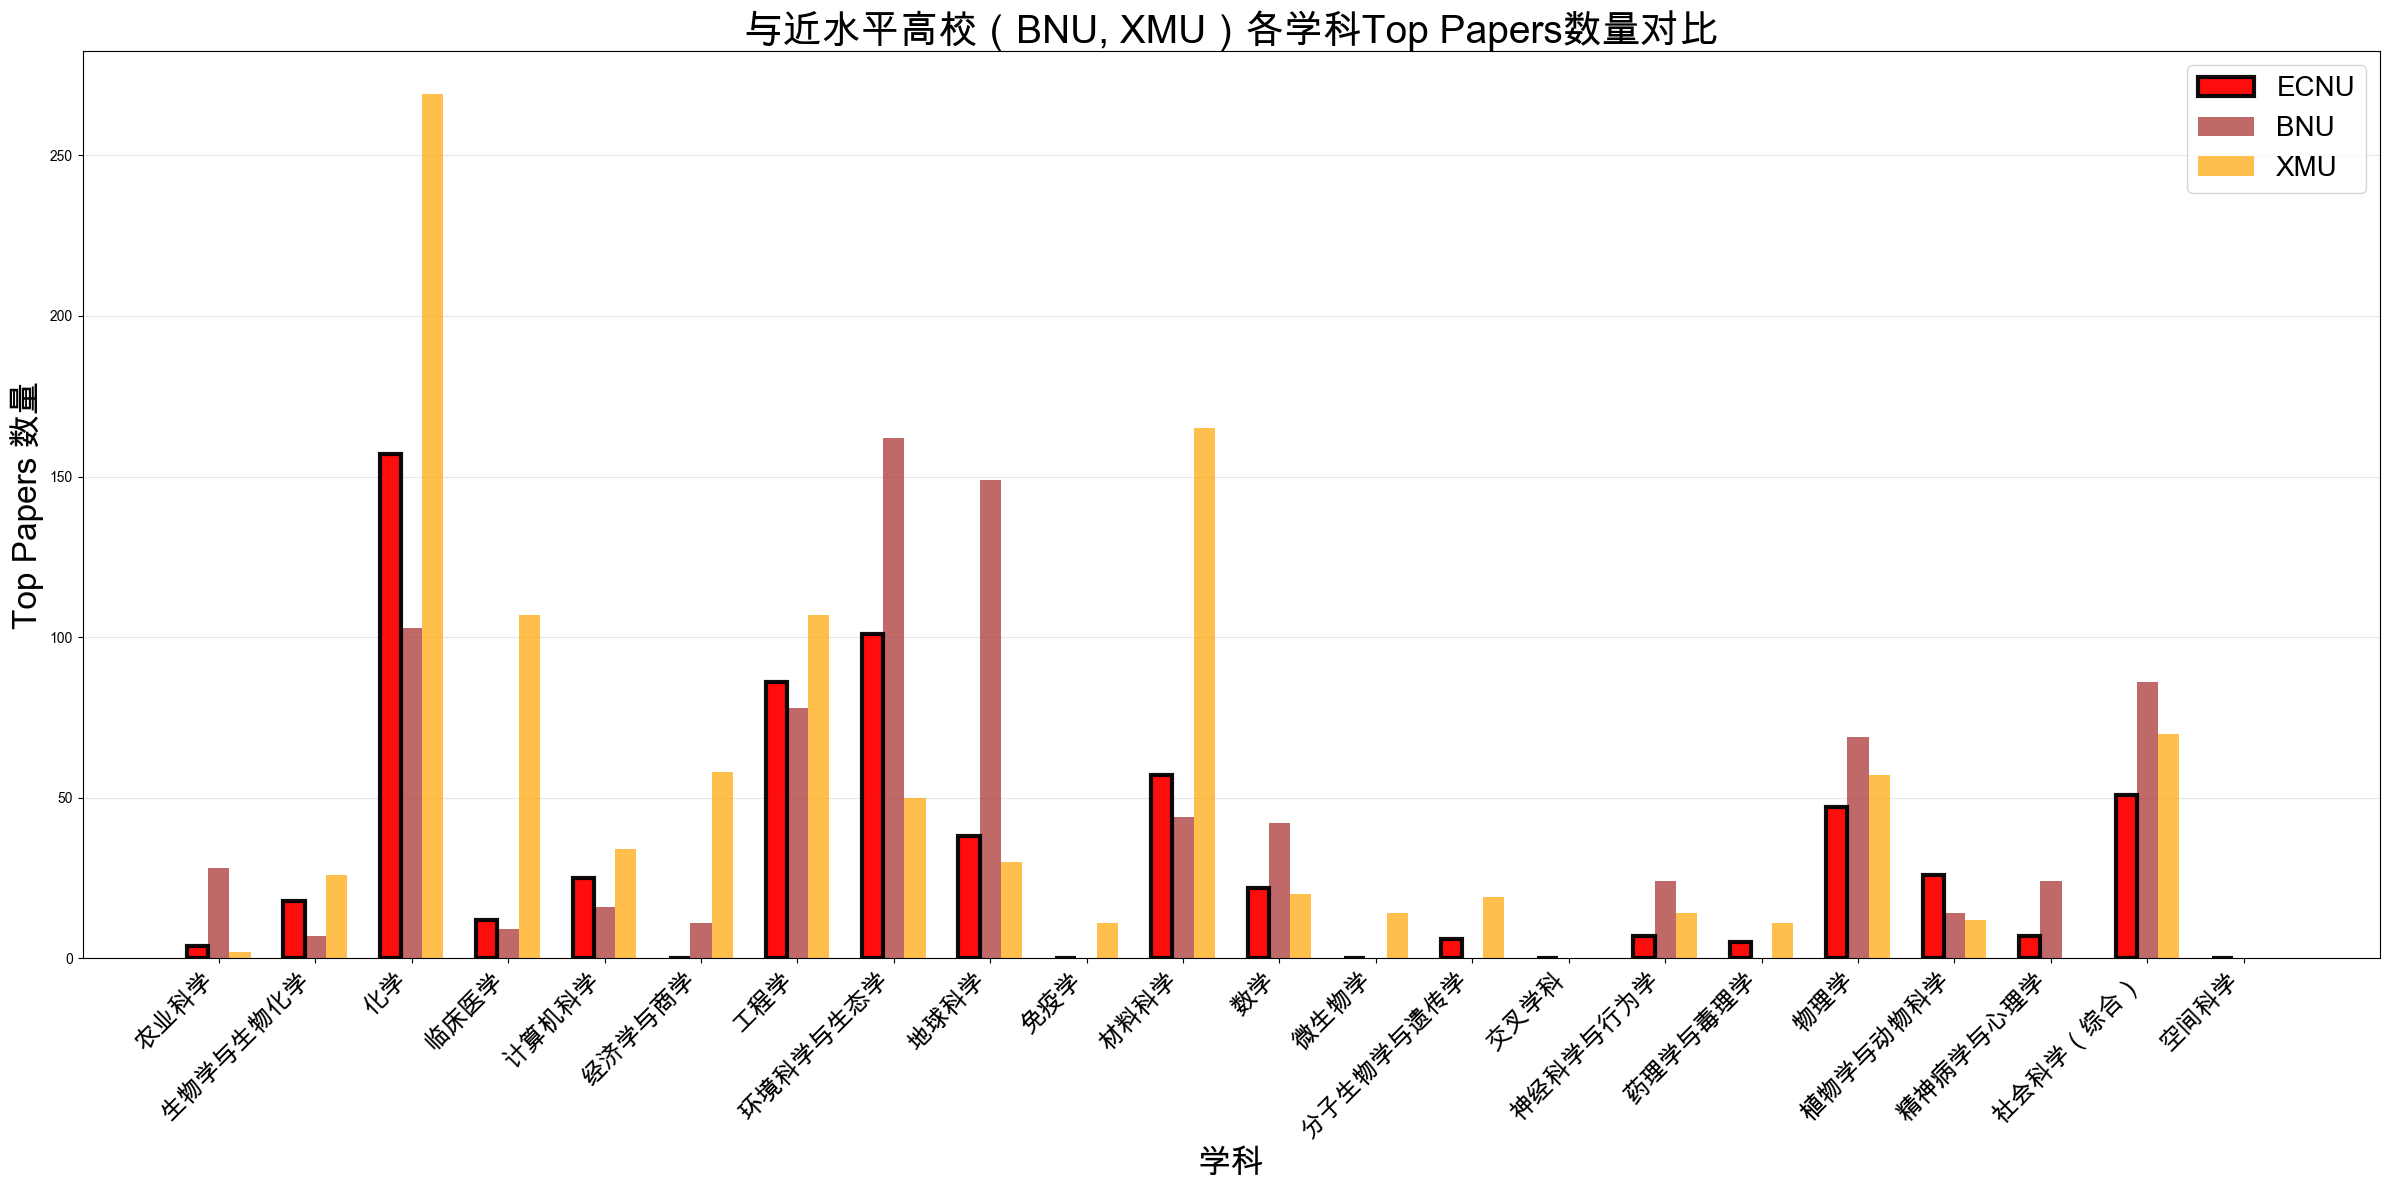

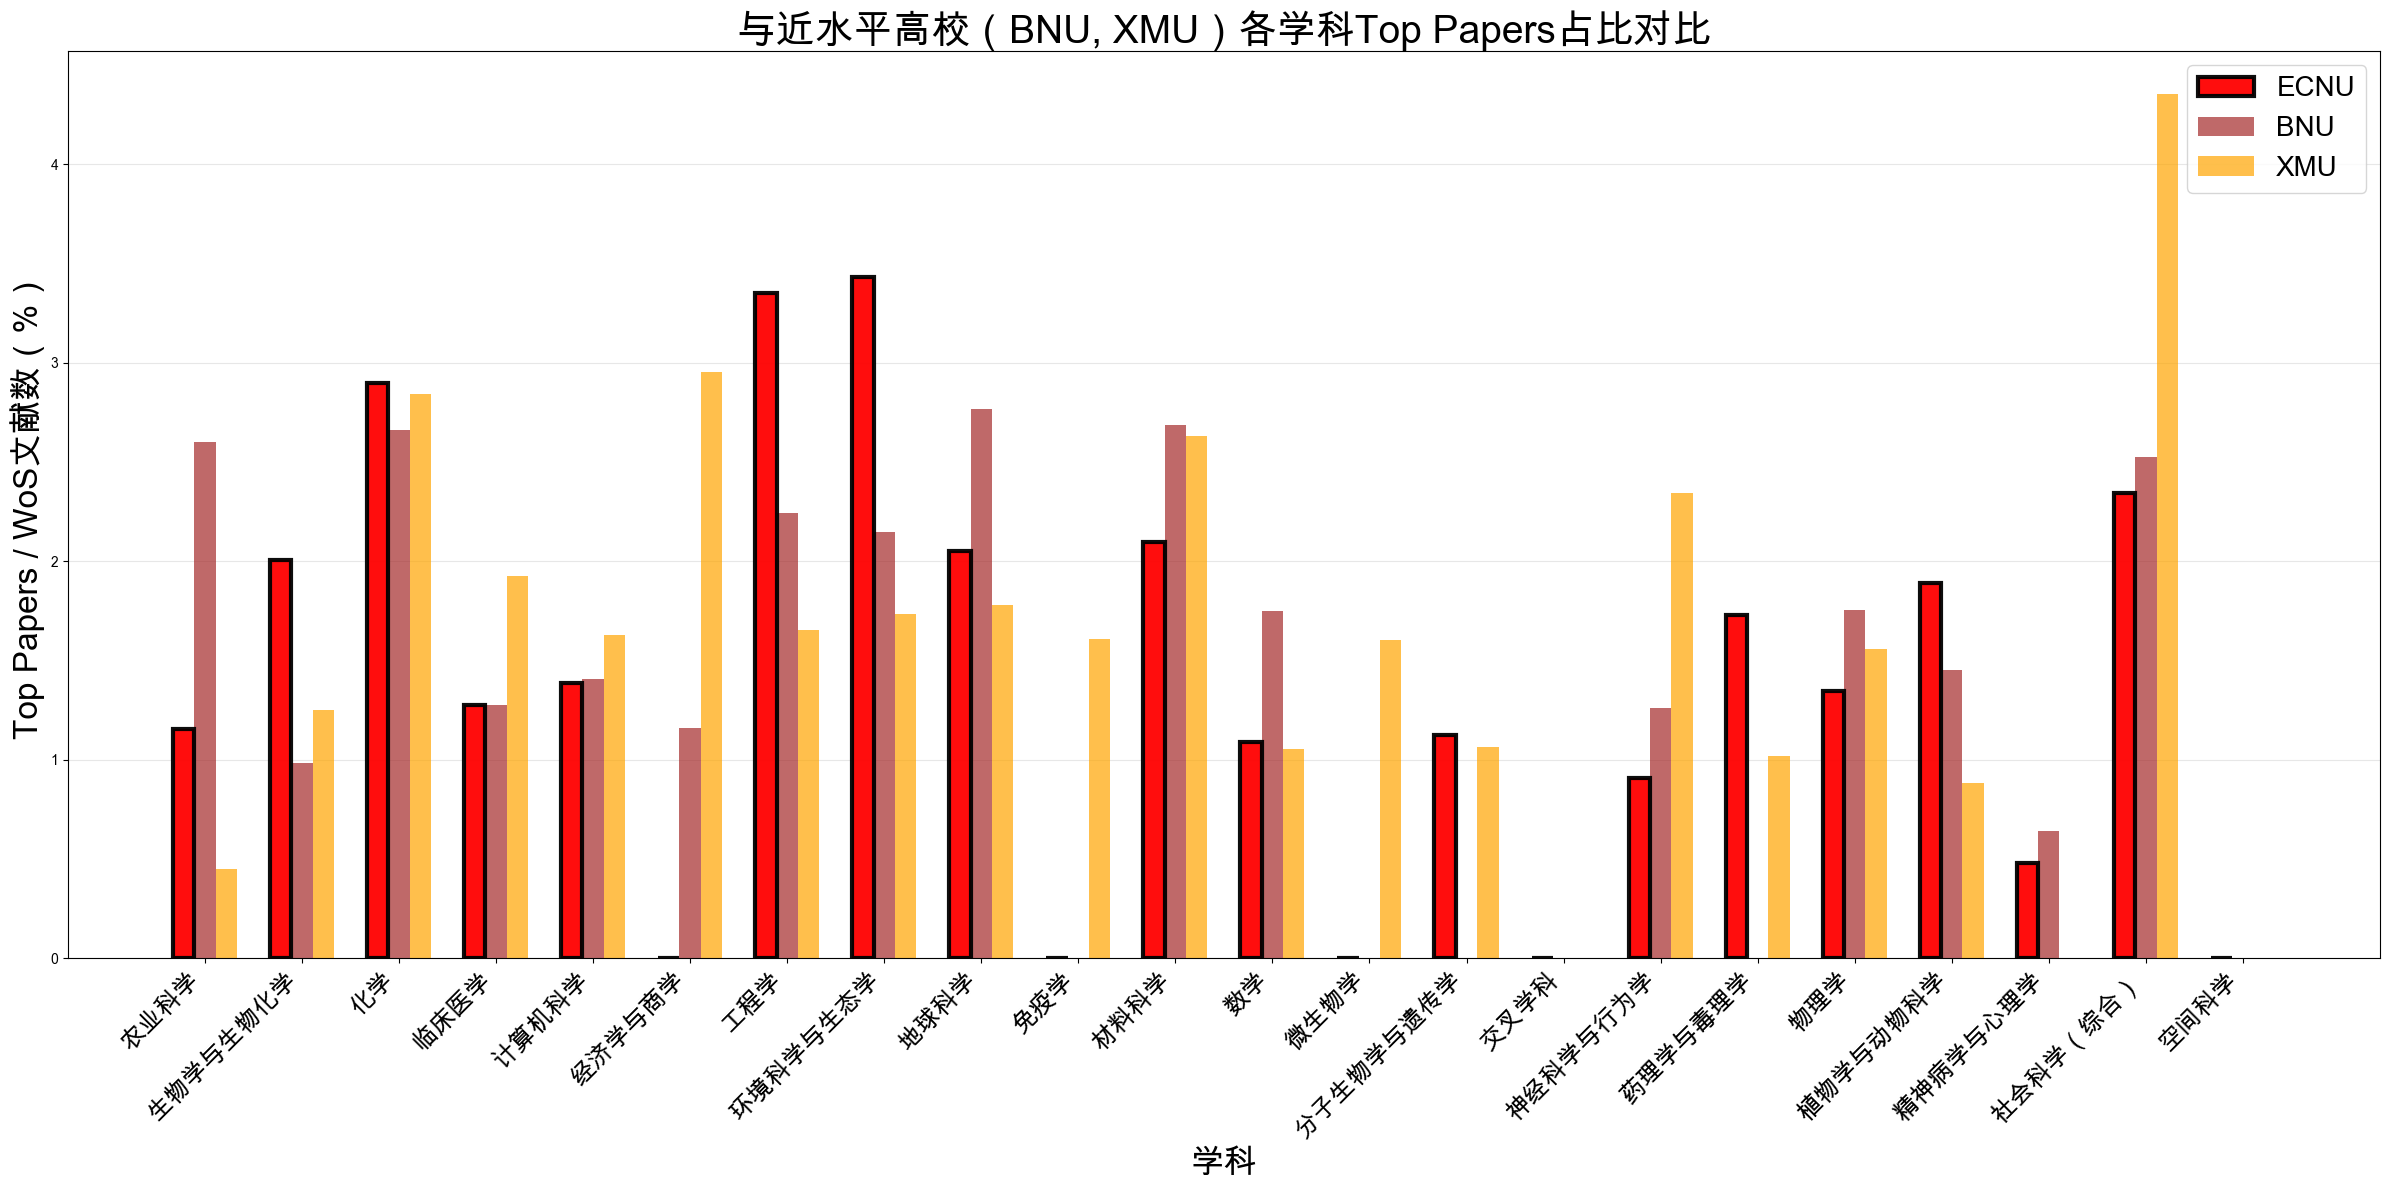

In [64]:
# Top Papers 数量与占比数据准备
top_papers_data = data_matrix[:, :, 3]  # shape: 大学数 × 学科数
wos_docs_data = data_matrix[:, :, 0]    # Web of Science Documents 数量
with np.errstate(divide='ignore', invalid='ignore'):
    ratio_data = np.where(wos_docs_data == 0, np.nan, top_papers_data / wos_docs_data * 100)

peer_indices = [0, 3, 4]  # 选择 i = 0,3,4
peer_universities_short = [universities_short[i] for i in peer_indices]
peer_colors = ['red', 'brown', 'orange']
x = np.arange(len(academic_fields_zh))
width = 0.22

def plot_bar_compare(data_matrix, indices, universities_short, colors, ylabel, title, value_fmt=None):
    fig, ax = plt.subplots(figsize=(24, 12))
    for idx, (i, univ_name, color) in enumerate(zip(indices, universities_short, colors)):
        data = np.nan_to_num(data_matrix[i], nan=0)
        if idx == 0:
            bars = ax.bar(x + idx * width, data, width, label=univ_name, color=color, alpha=0.95, linewidth=2.5, edgecolor='black', zorder=3)
            for bar in bars:
                bar.set_linewidth(3)
                bar.set_edgecolor('black')
        else:
            ax.bar(x + idx * width, data, width, label=univ_name, color=color, alpha=0.7, linewidth=1.2, zorder=2)
    ax.set_xlabel('学科', fontsize=24, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=24, fontweight='bold')
    ax.set_title(title, fontsize=28, fontweight='bold')
    ax.set_xticks(x + width)
    ax.set_xticklabels(academic_fields_zh, rotation=45, ha='right', fontsize=18, fontweight='bold')
    ax.legend(fontsize=20)
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

# Top Papers 数量对比
plot_bar_compare(
    top_papers_data,
    peer_indices,
    peer_universities_short,
    peer_colors,
    ylabel='Top Papers 数量',
    title='与近水平高校（BNU, XMU）各学科Top Papers数量对比'
)

# Top Papers 占比对比
plot_bar_compare(
    ratio_data,
    peer_indices,
    peer_universities_short,
    peer_colors,
    ylabel='Top Papers / WoS文献数（%）',
    title='与近水平高校（BNU, XMU）各学科Top Papers占比对比',
    value_fmt=lambda v: f'{v:.1f}'
)
# print("学科名称列表：")
# print(academic_fields_zh)
# # 打印出Top Papers数量的具体数值
# print("Top Papers数量具体数值：")
# for idx, univ_name in zip(peer_indices, peer_universities_short):
#     values = top_papers_data[idx]
#     values_str = [f"{int(v)}" if not np.isnan(v) else "NaN" for v in values]
#     print(f"{univ_name}: {values_str}")
# print("WoS文献总数具体数值：")
# for idx, univ_name in zip(peer_indices, peer_universities_short):
#     values = wos_docs_data[idx]
#     values_str = [f"{int(v)}" if not np.isnan(v) else "NaN" for v in values]
#     print(f"{univ_name}: {values_str}")
# # 打印出Top Papers占比的具体数值
# print("Top Papers占比具体数值（%）：")
# for idx, univ_name in zip(peer_indices, peer_universities_short):
#     values = ratio_data[idx]
#     values_str = [f"{v:.2f}" if not np.isnan(v) else "NaN" for v in values]
#     print(f"{univ_name}: {values_str}")